<a href="https://colab.research.google.com/github/Yash-Kavaiya/mini-projects/blob/main/IMP_PCMLAI_M16_PCA_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA, KernelPCA
import sklearn
import matplotlib.pyplot as plt

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Introduction

In this notebook we are going to learn about denoisifying images using PCA. We begin with a simple example of noisy linear observations. We then introduce the fashion MNIST data-set, where we will take some images and artificially add noise. You must then submit a set of exercises related to denoisifying the images using PCA and Kernel PCA.

To try and understand how PCA can help us denoisify, consider the following plot:

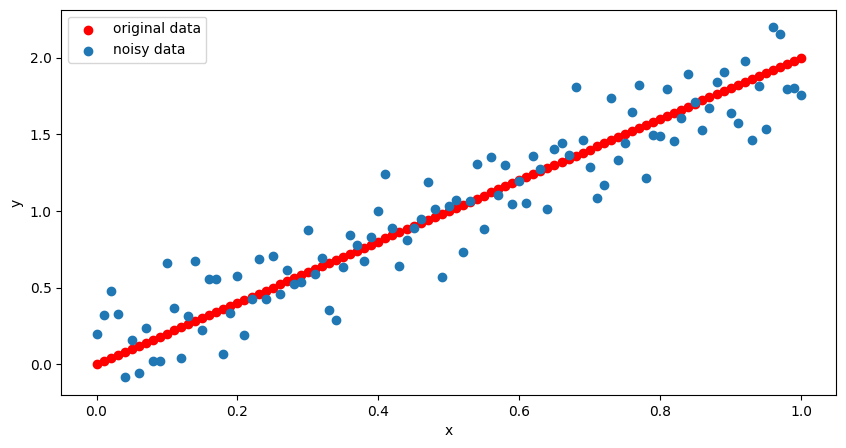

In [9]:
# original data
x = np.linspace(0, 1, 101)
y = 2 * x

# add noise to data
y_noisy = y + np.random.normal(0, 0.2, size = x.shape)

fig, ax = plt.subplots(nrows = 1, ncols = 1)
fig.set_figheight(5)
fig.set_figwidth(10)

ax.scatter(x, y, color = 'r', label = 'original data')
ax.scatter(x, y_noisy, label = 'noisy data')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

The plot above shows simple linear data, corrupted by a small amount of Gaussian noise. Can you see why a 1-dimensional representation of the data can help in getting rid of the noise? If we project every noisy data point to the line $y = 2x$, we recover out original data exactly! This is the idea behind PCA denoisifying. This is a simple example, so we are going to explore a more interesting one:

# Denoisify Fashion-MNIST

We will now try to denoisify data from the fashion MNIST data-set. This is an analogous data set to the MNIST hand written digits set, however it is made up of pictures of different types of clothing. It consists of 10 different labels: t-shirt (0), trouser (1), pullover (2), dress (3), coat (4), sandal (5), shirt (6), sneaker (7), bag (8), ankle boot (9). The code below downloads 5022 images from the data-set and splits into a training and testing data-set. We will then visualize the test set.

In [10]:
X = np.genfromtxt('/content/drive/MyDrive/fashion-mnist_train.csv', delimiter=',')

Y = X[1:, 0]
X_train = X[21:, 1:]
X_test = X[1:21, 1:]

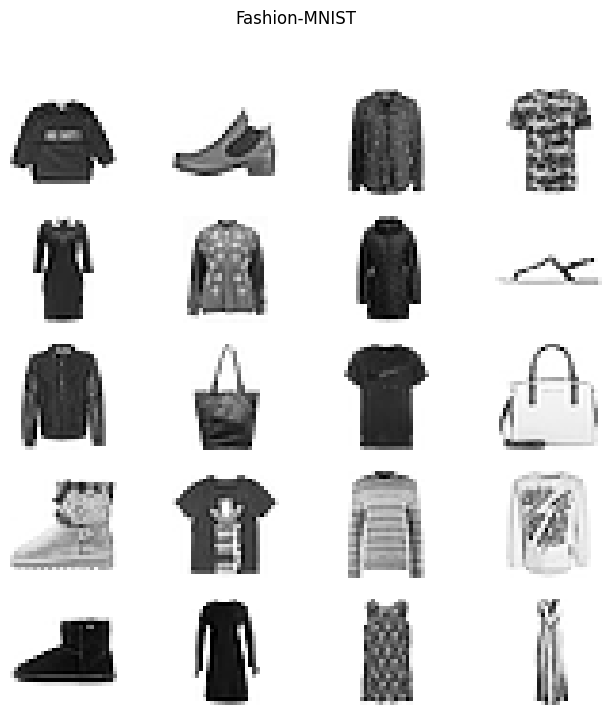

In [11]:
def plot_images(X, title):
    # we use this function to plot the training images
    fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(8, 8))
    for img, ax in zip(X, axs.ravel()):
        ax.imshow(img.reshape((28, 28)), cmap="Greys")
        ax.axis("off")
    fig.suptitle(title, fontsize=12)

plot_images(X_test, 'Fashion-MNIST')

We will artificially add noise to the images and display them:

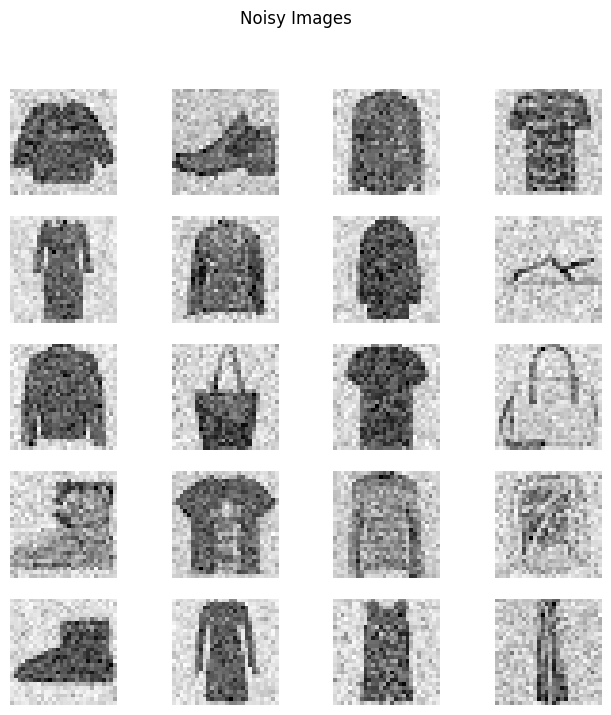

In [12]:
X_noisy = X_test + np.random.normal(loc = 0, scale = 40, size = X_test.shape)

plot_images(X_noisy, 'Noisy Images')

To denoisify, we will use the training set to *learn* a low-dimensional space that represents our data, which can be used to remove noise from *similar* images. We can see an example here: https://scikit-learn.org/stable/auto_examples/applications/plot_digits_denoising.html where we use a data-set of uncorrupted digits to remove the noise from corrupted digits.

Note that we treat each image as a flat vector with 784 features. Ideally we want to take bigger advantages of known structure in the images, for example, when flattening the image, we lose a lot of spatial structure (a pixel is closely related to all those around it)!. As an example, the following paper: https://www.researchgate.net/publication/267228169_PCA_based_image_denoising adds filters to the processes to achieve much better results.

Other examples of exploiting image structure will be introduced in Module 21 (Convolutional Neural Networks).

# Exercises

The following code will train a PCA model on the training set. It then uses the learned principal components to project the noisy data into a lower dimensional representation, and reconstructs them. We hope this will denoisify the image. However, as you see, it will no be very good. The noise will be gone but the images will not resemble the original. Try increasing the number of principal components to fix this! Play around with it until you get a good denoisification. Answer the following questions:

1. What is the behavior of the reconstructed images as you include more components?
- As you include more principal components, the reconstructed images will become closer to the original images. This is because higher-dimensional representations capture more details and variability in the data. Therefore, increasing the number of principal components will lead to better reconstruction.
2. What is the best number of components for denoisifying this particular test set?
- 15-20 components

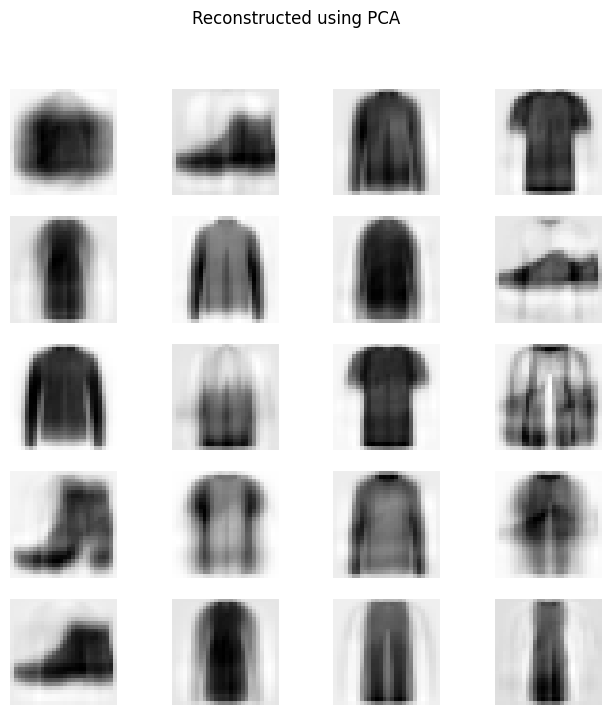

In [13]:
# fit a PCA model
number_of_principal_components = 10
pca = PCA(n_components = number_of_principal_components)
pca.fit(X_train)

# transform the noisy data into a lower dimensional representation and then back to a high dimensional one
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_noisy))

# plot the denoisified images
plot_images(X_reconstructed_pca, 'Reconstructed using PCA')

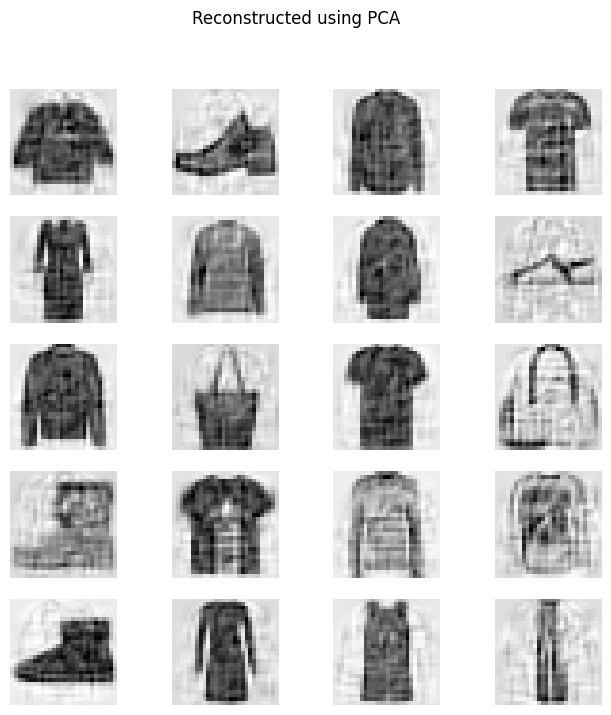

In [14]:
# fit a PCA model
number_of_principal_components = 200
pca = PCA(n_components = number_of_principal_components)
pca.fit(X_train)

# transform the noisy data into a lower dimensional representation and then back to a high dimensional one
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_noisy))

# plot the denoisified images
plot_images(X_reconstructed_pca, 'Reconstructed using PCA')

<ipython-input-11-f1cdf15dcd2e>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(8, 8))


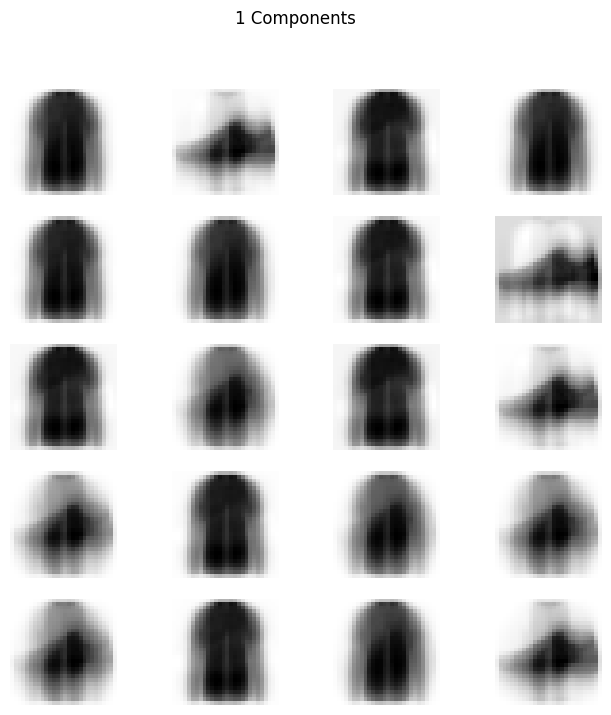

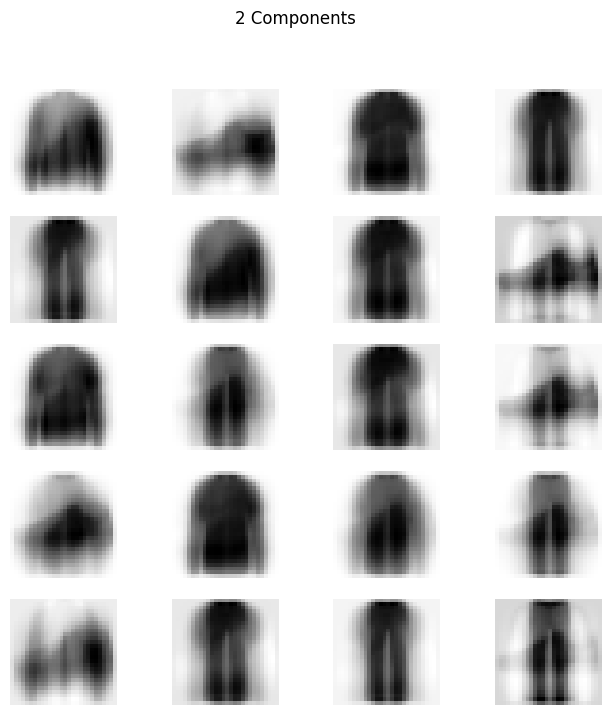

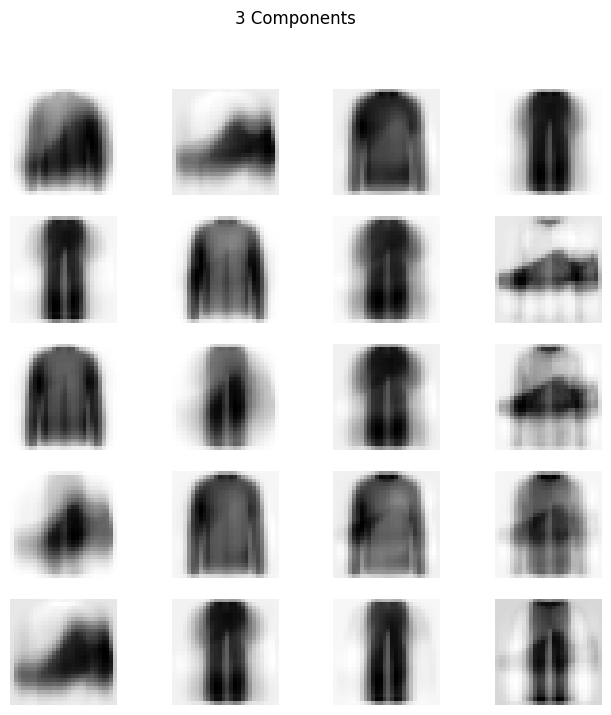

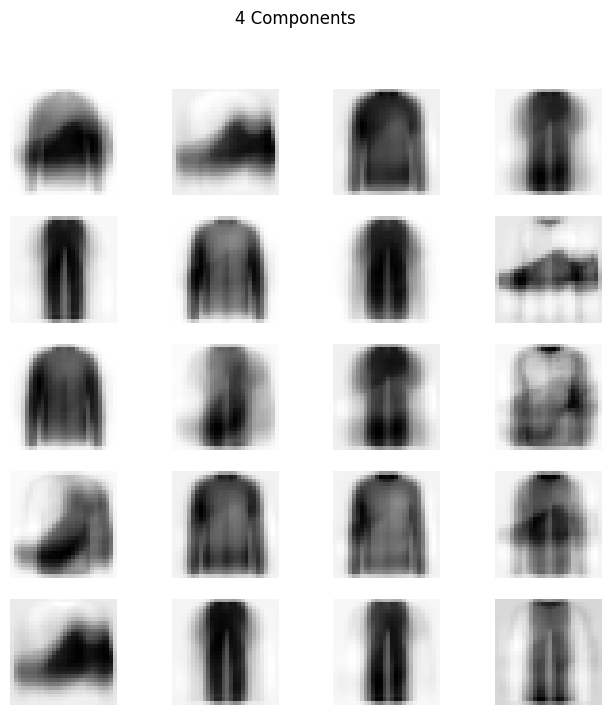

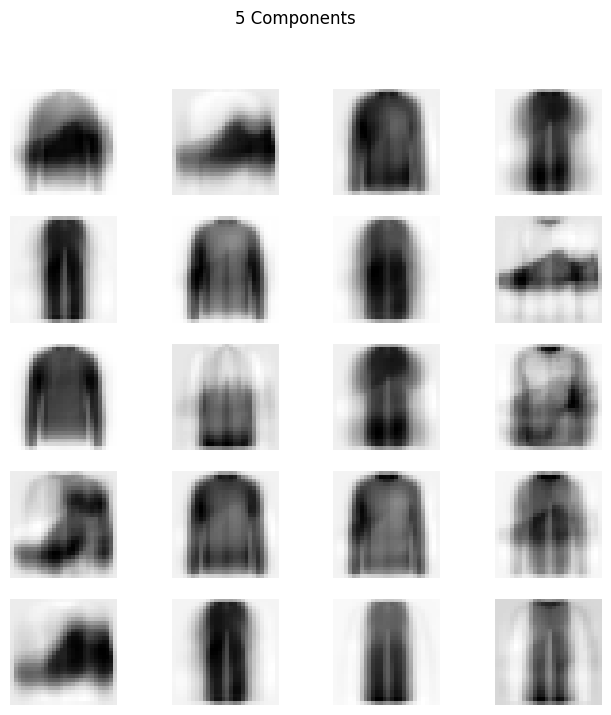

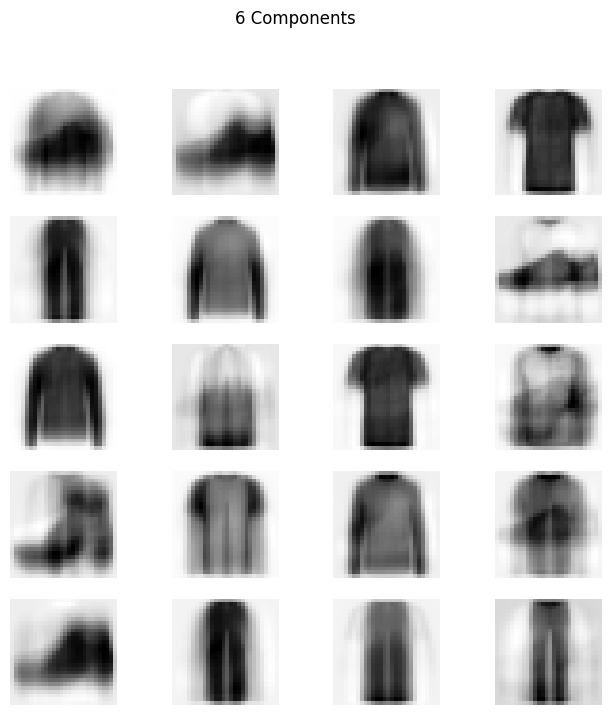

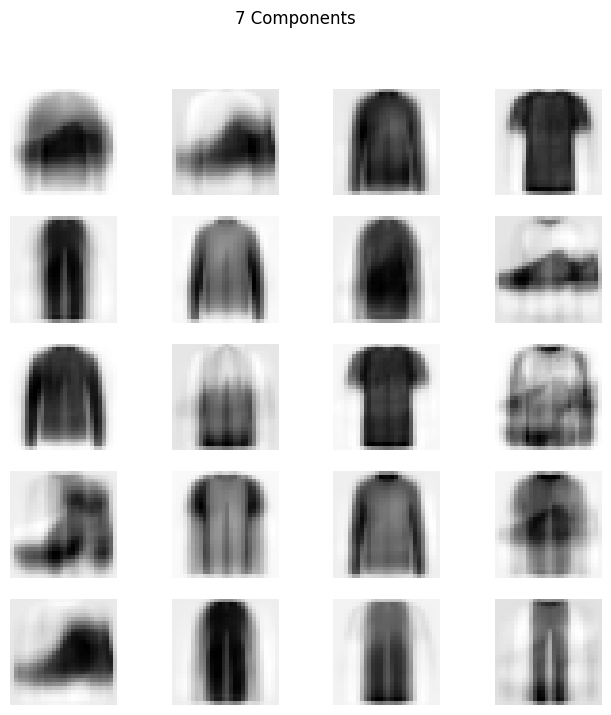

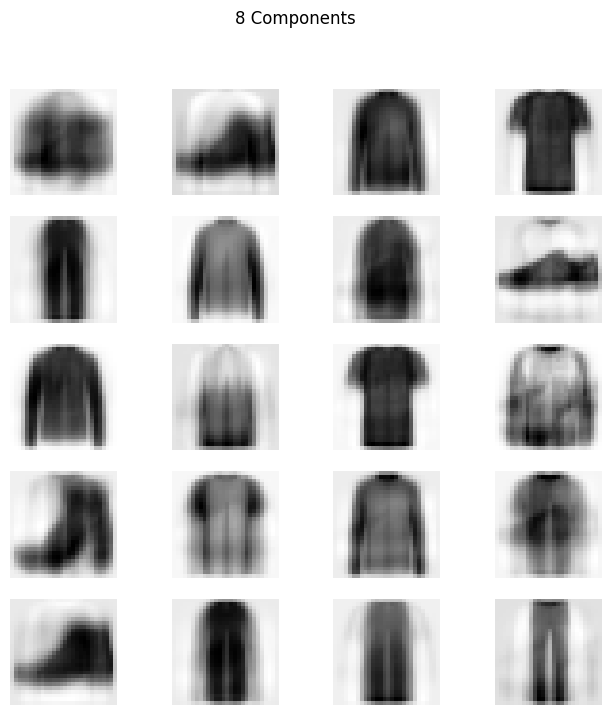

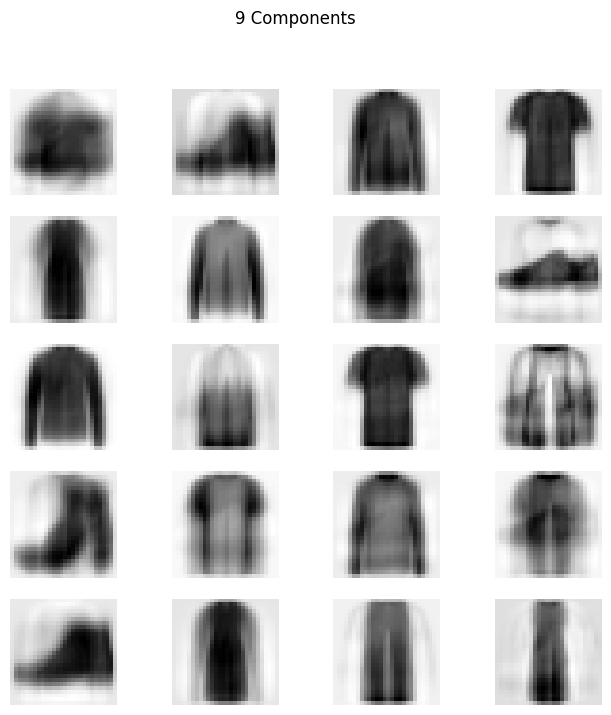

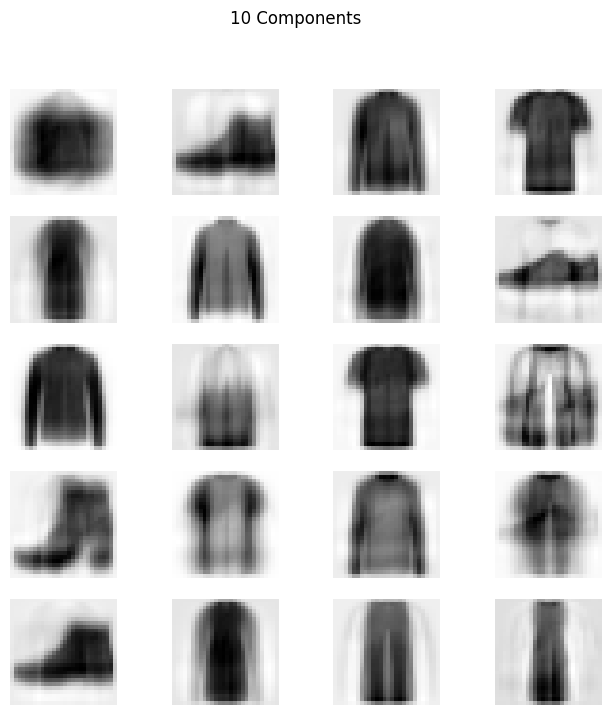

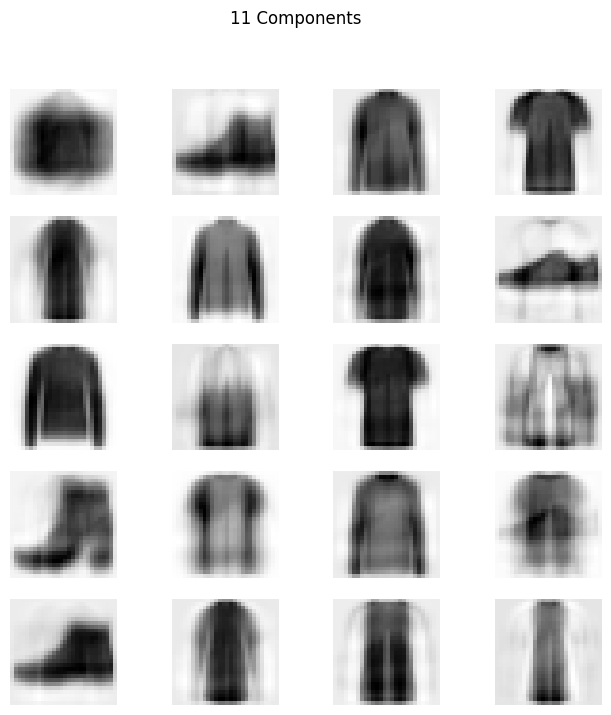

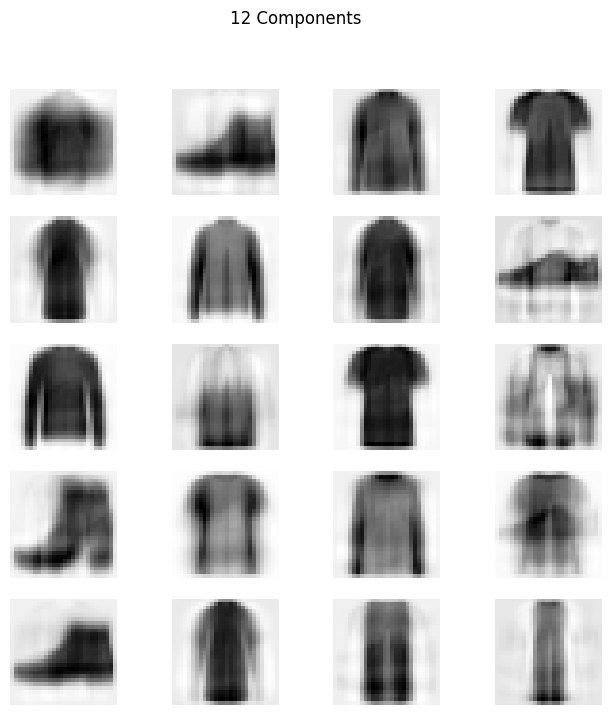

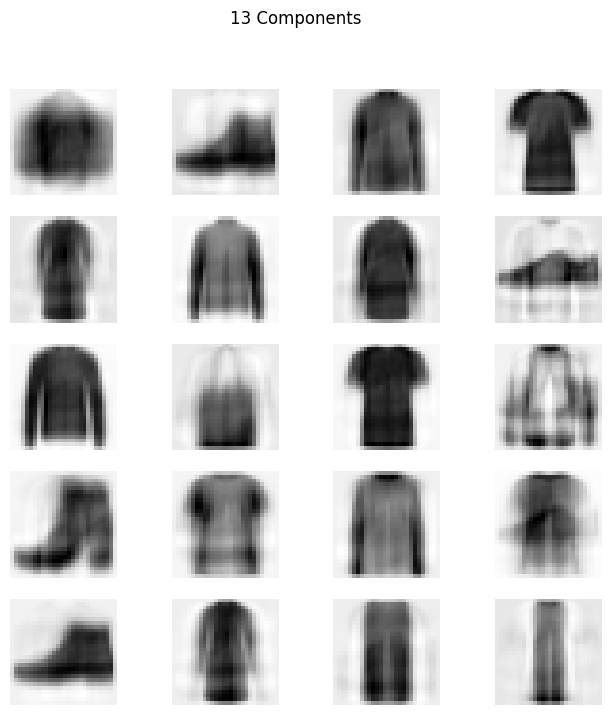

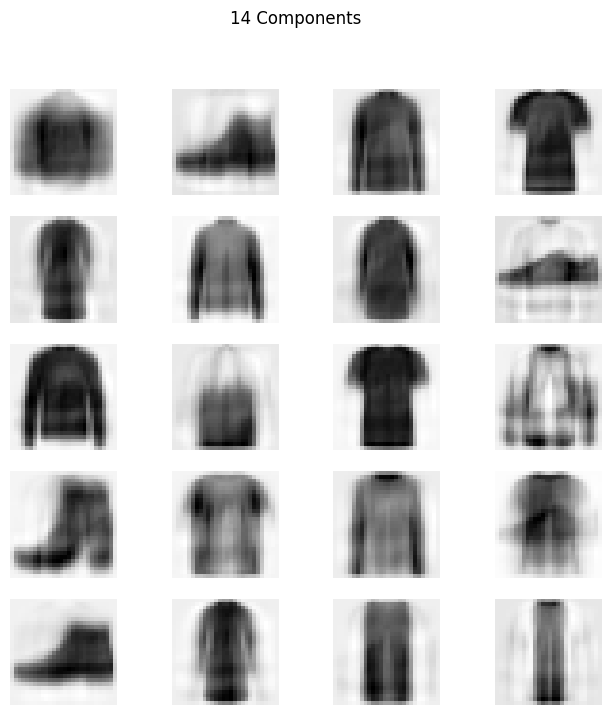

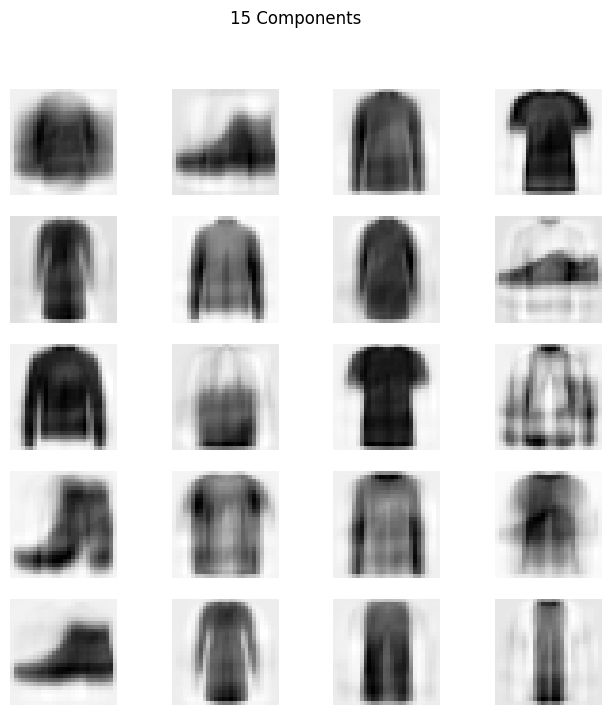

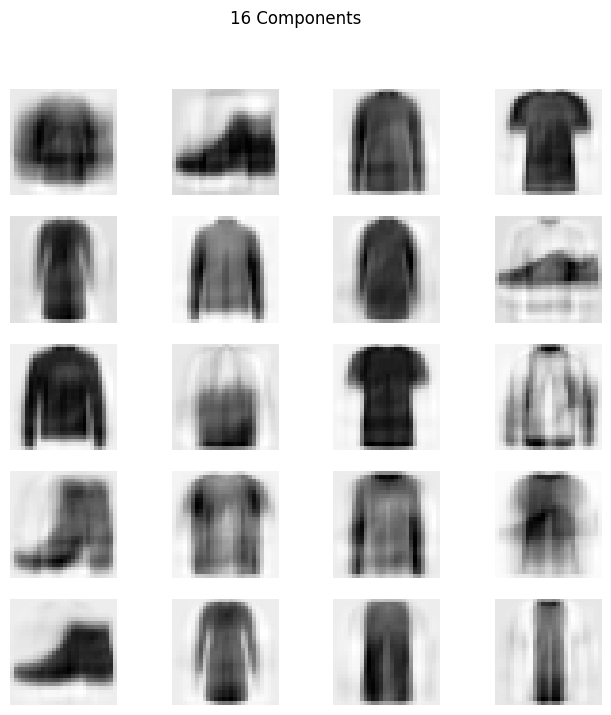

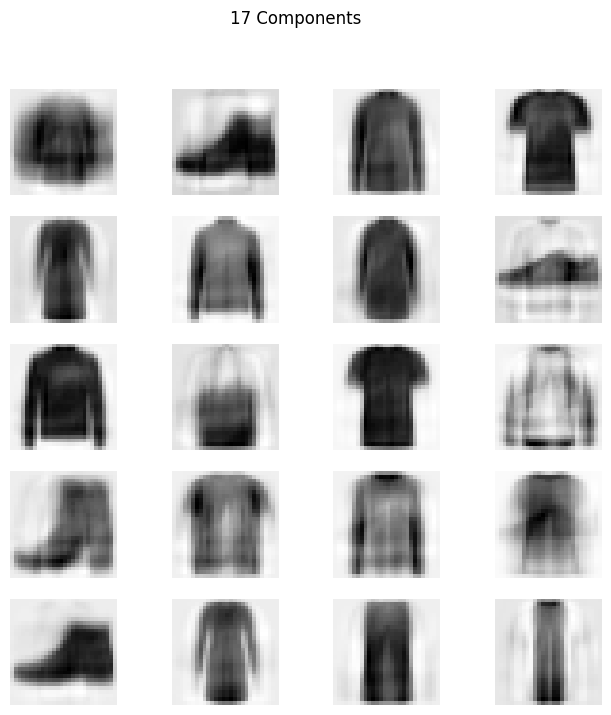

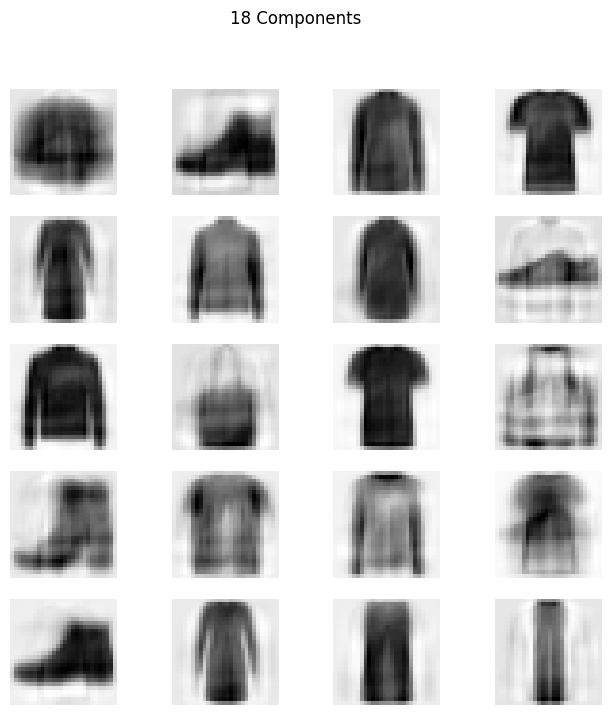

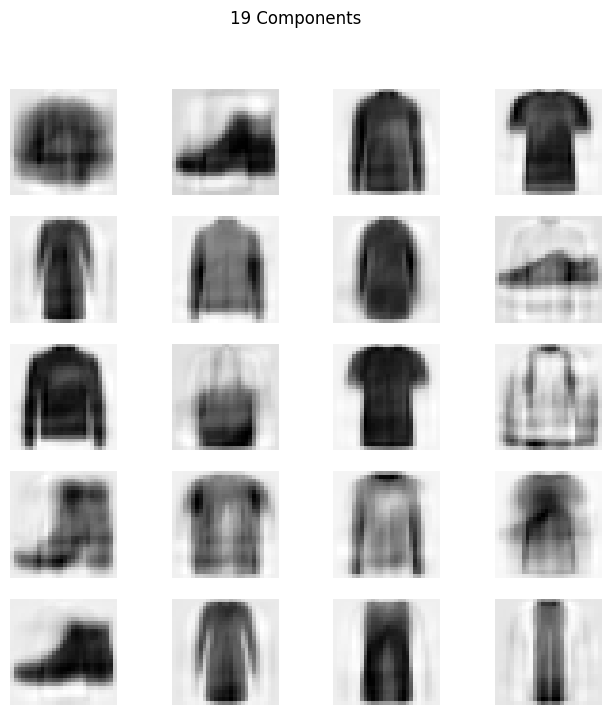

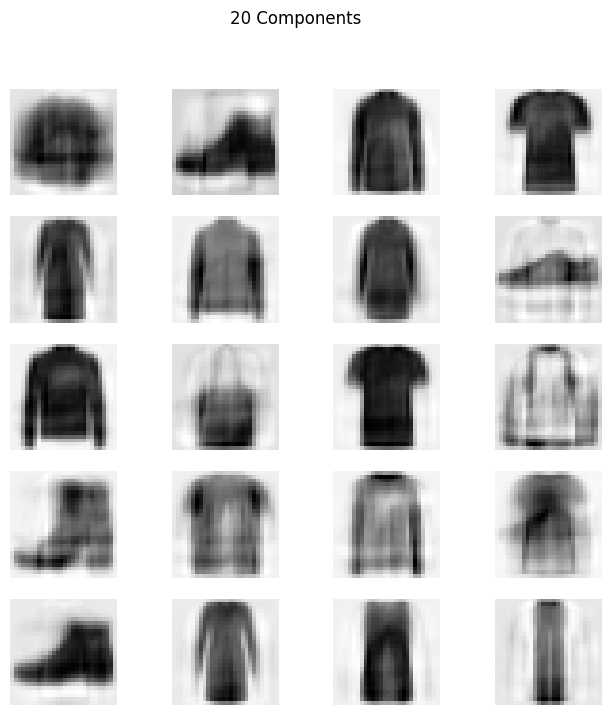

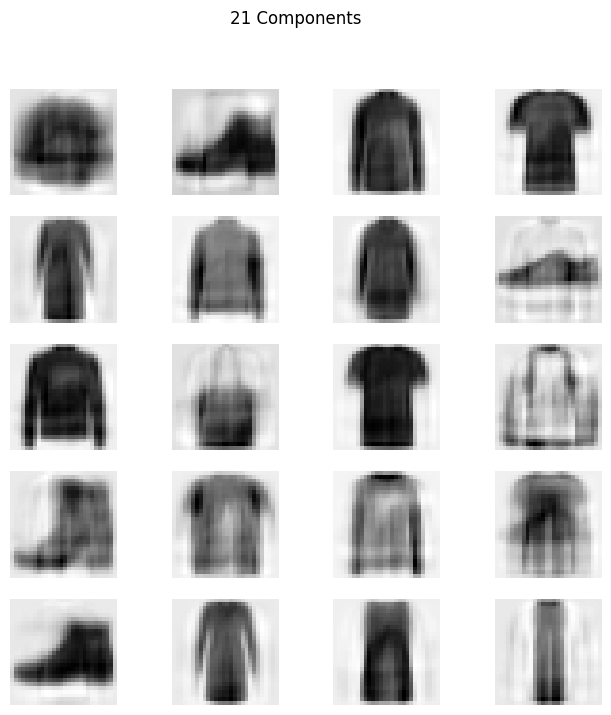

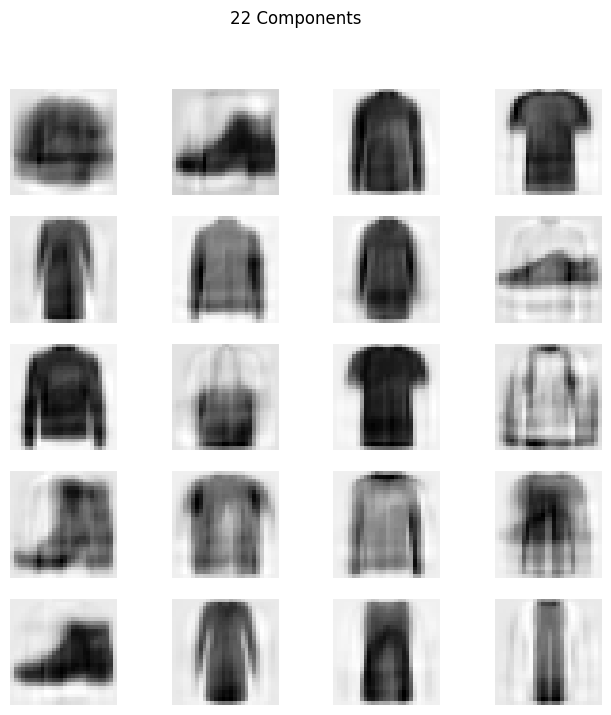

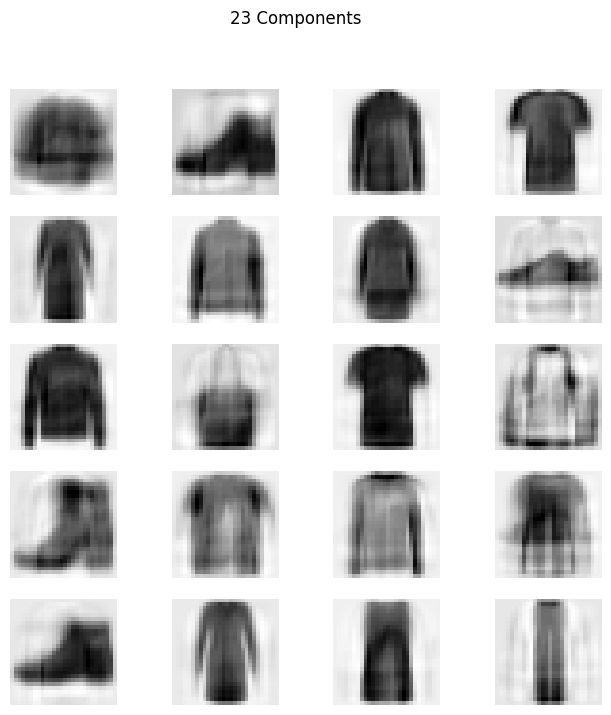

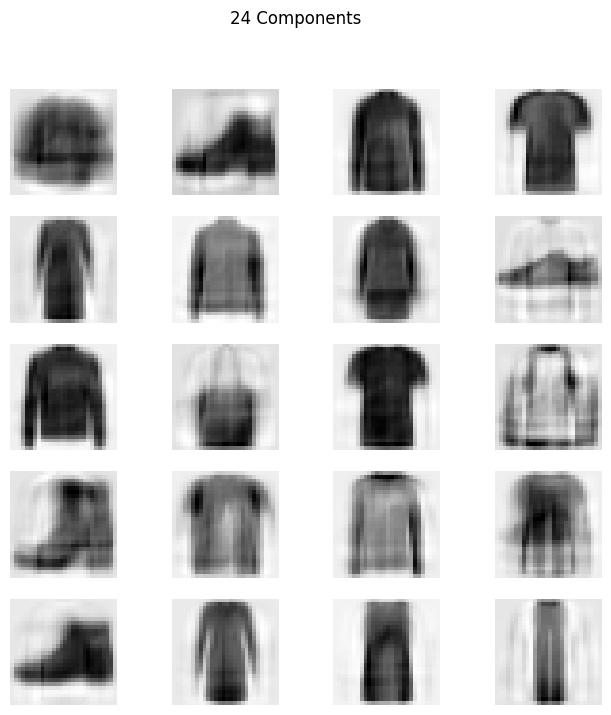

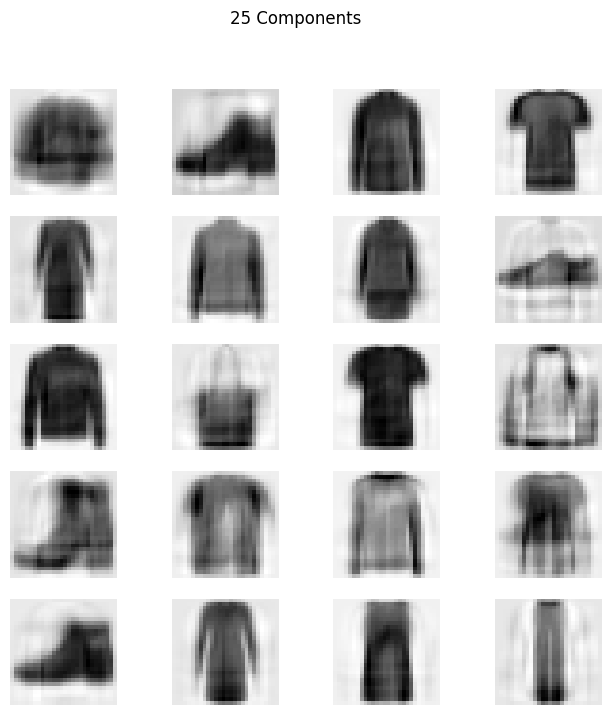

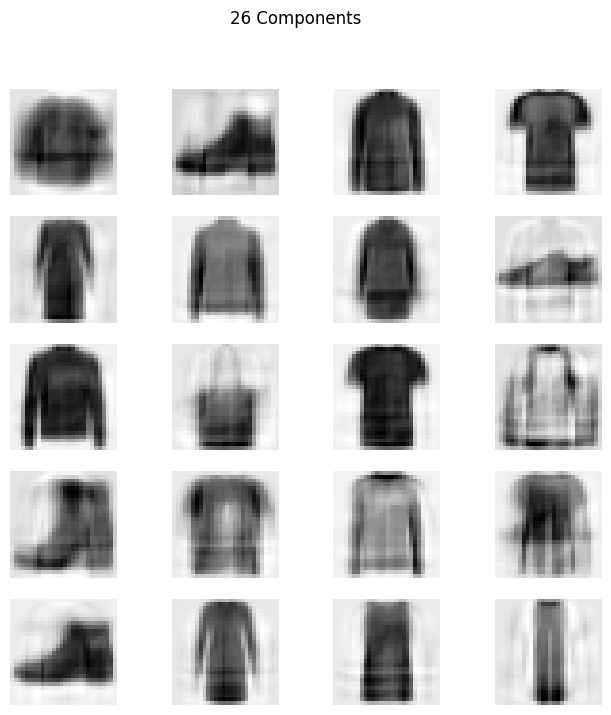

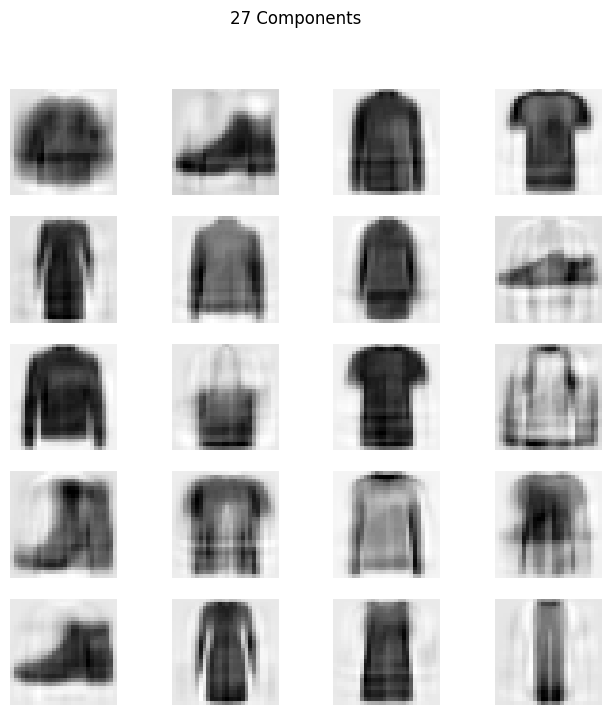

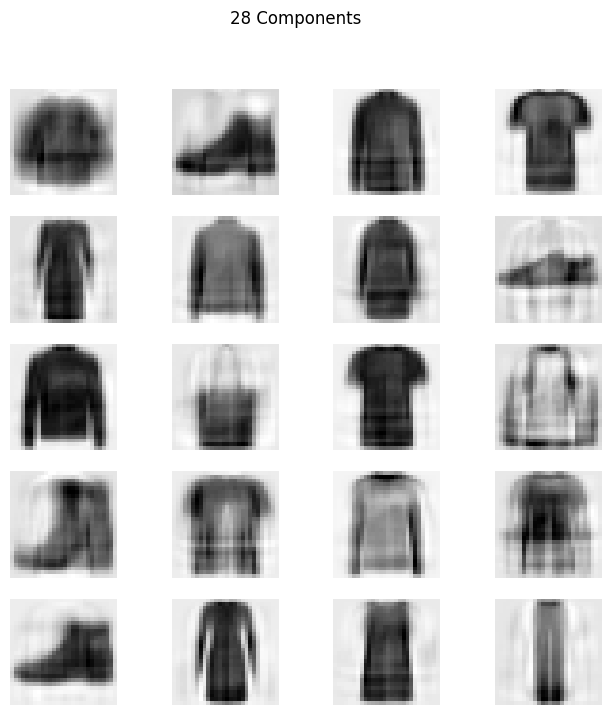

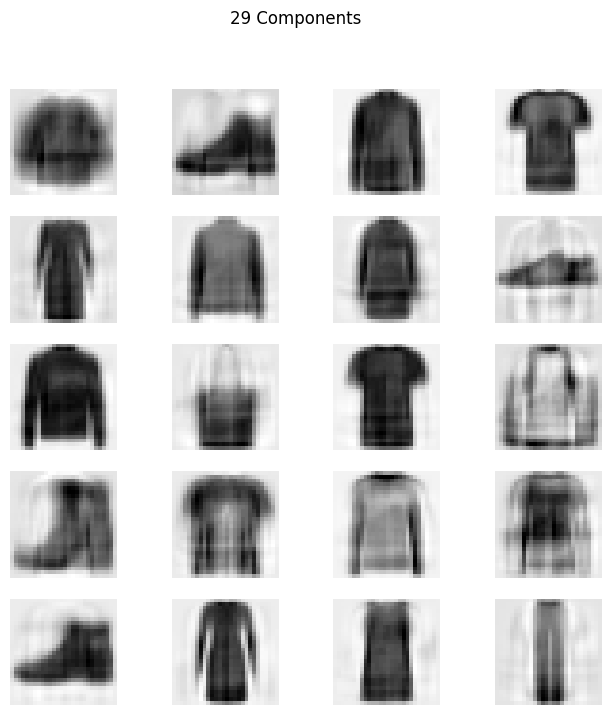

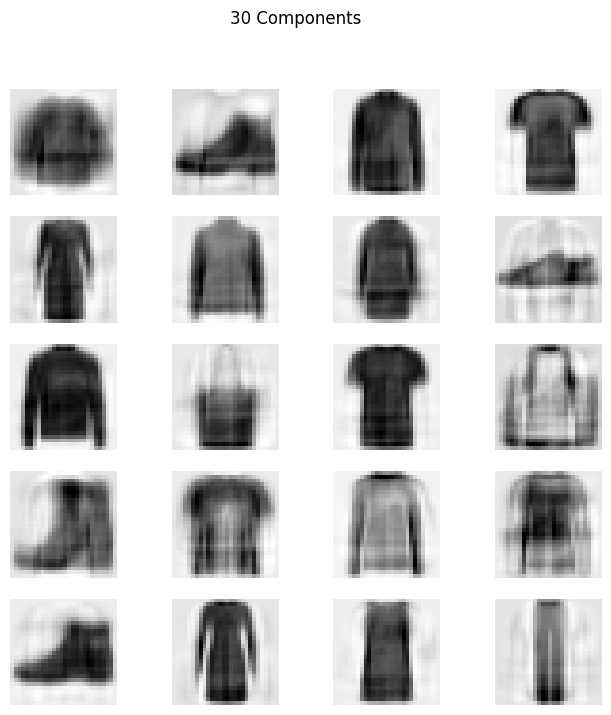

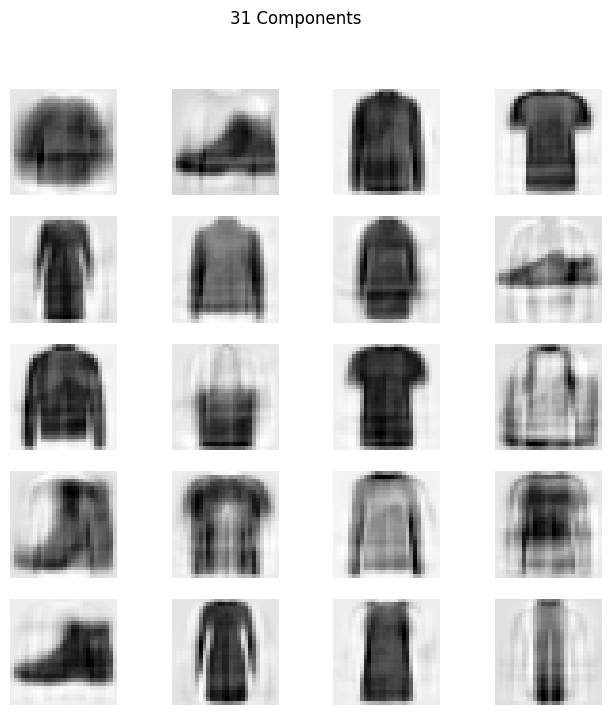

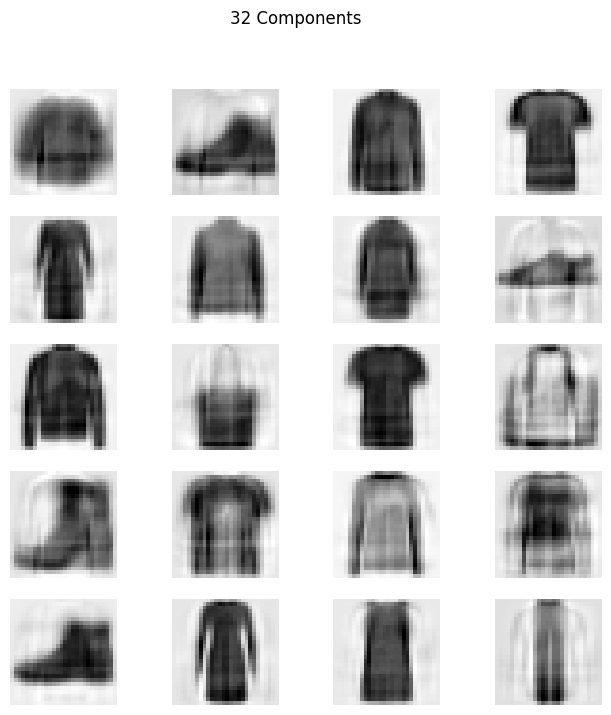

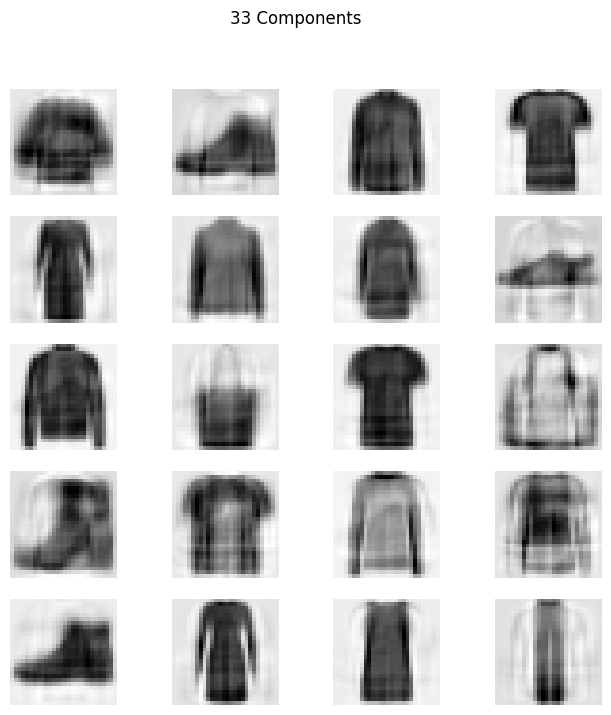

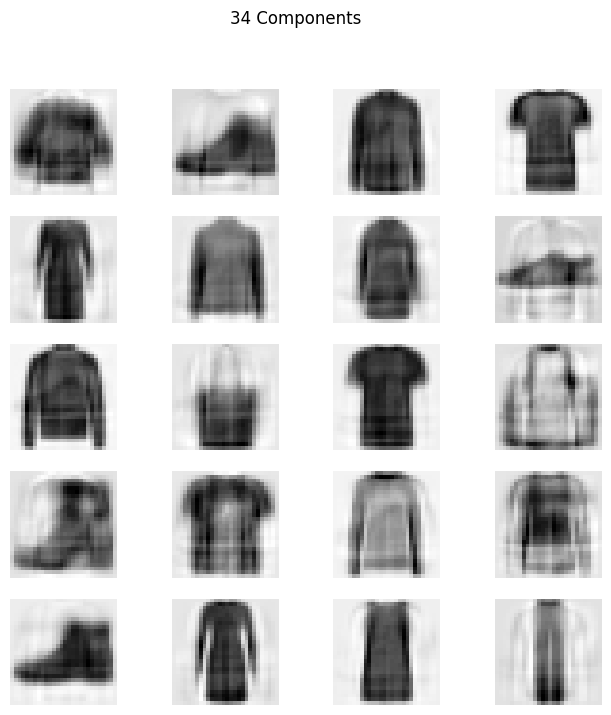

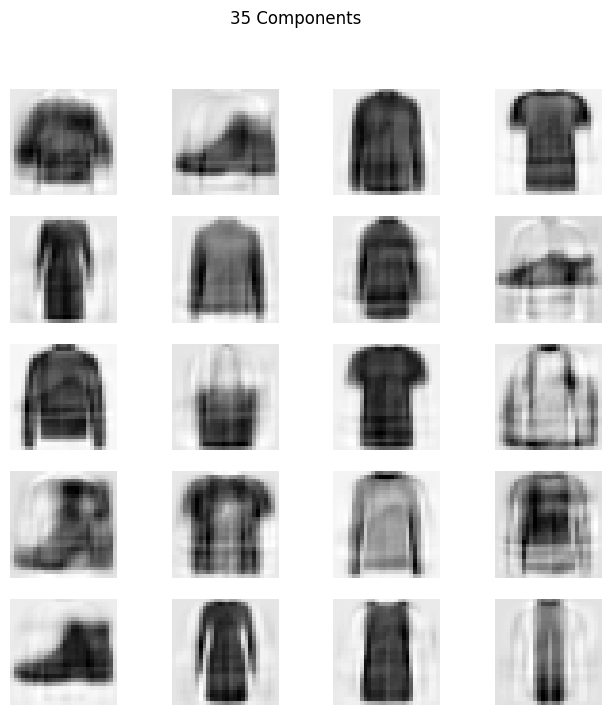

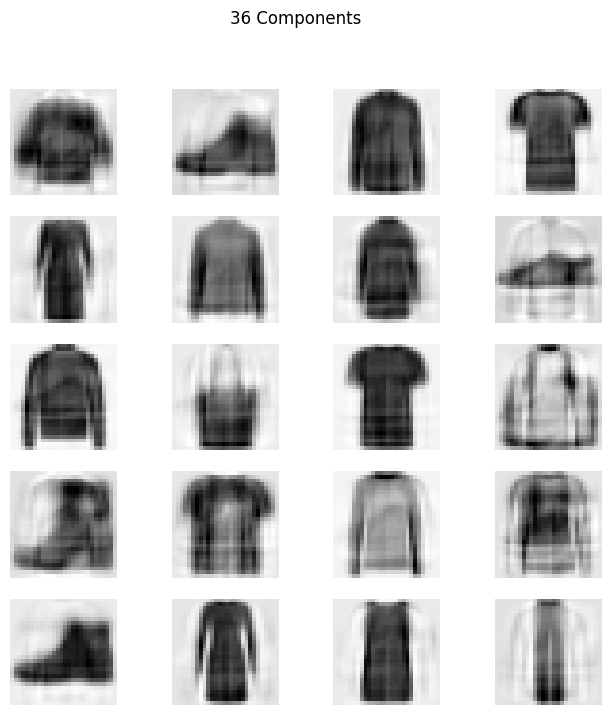

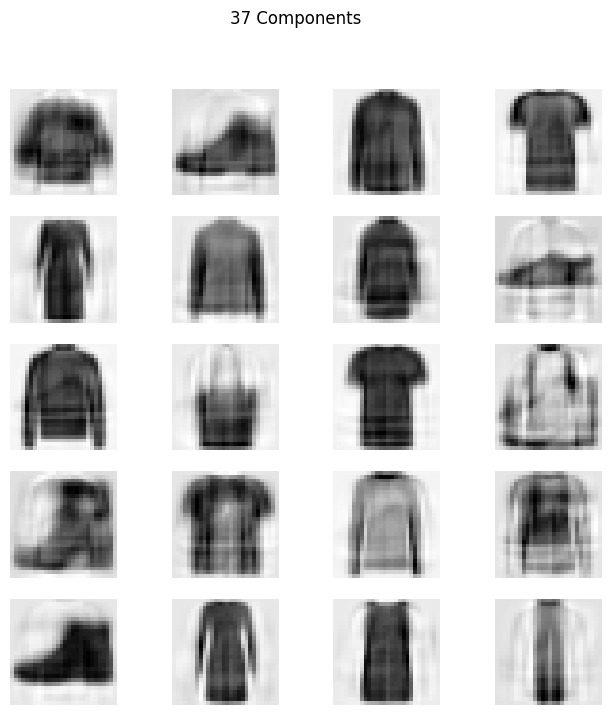

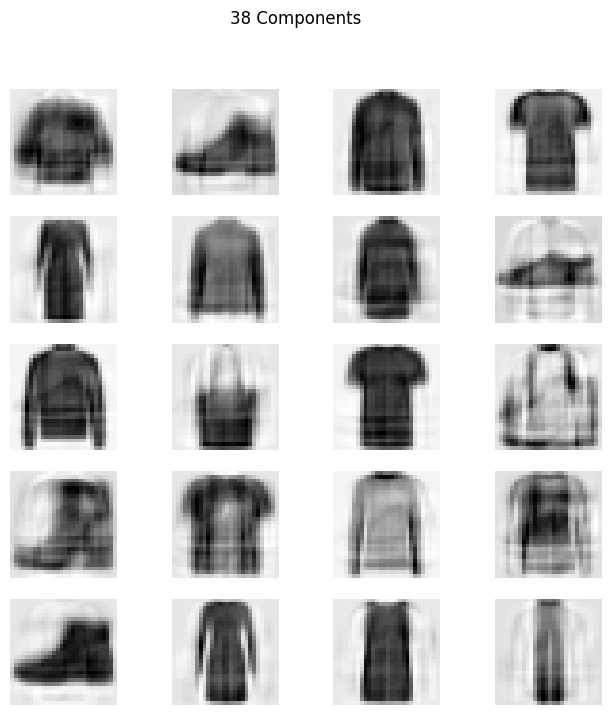

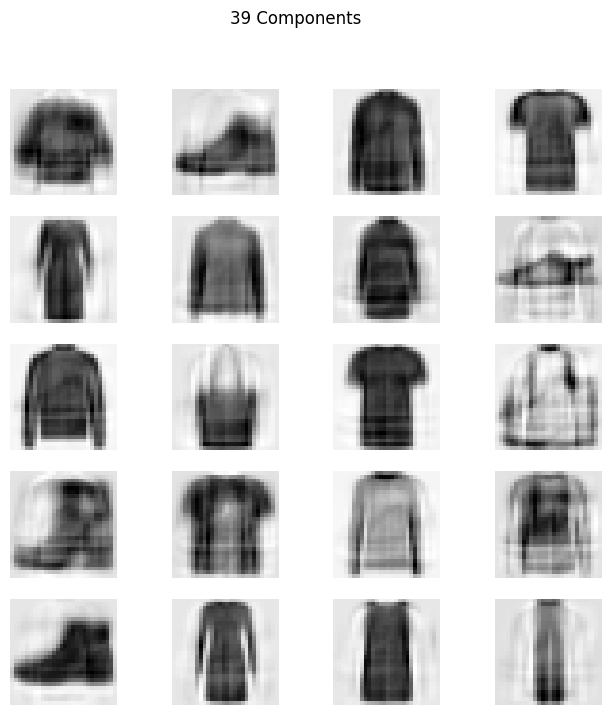

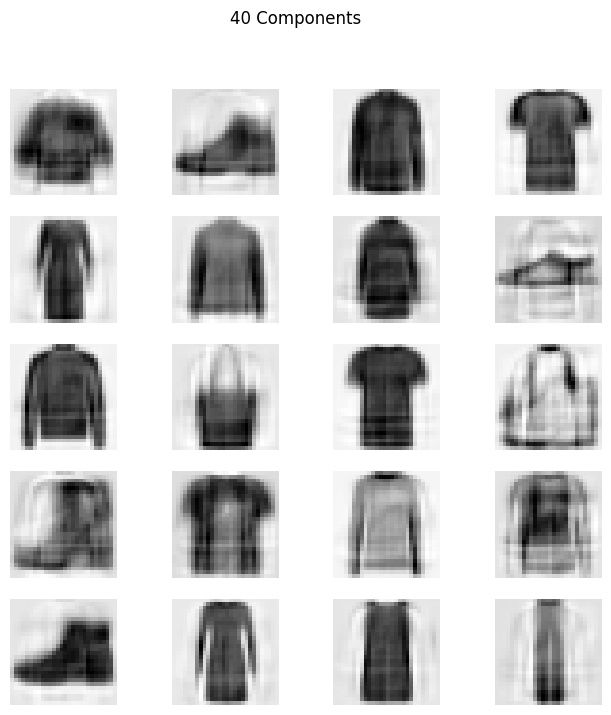

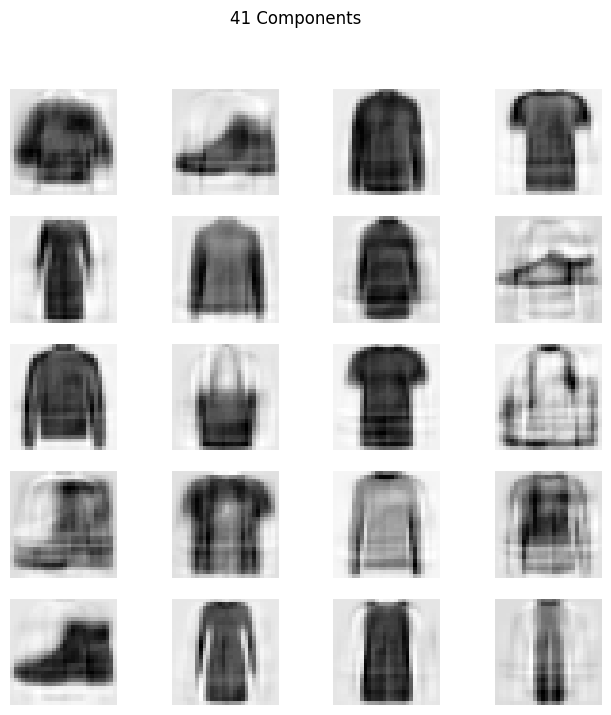

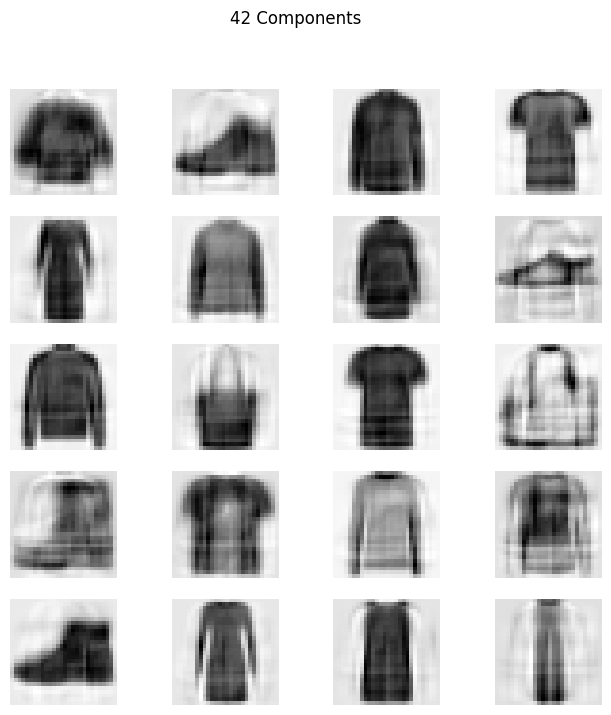

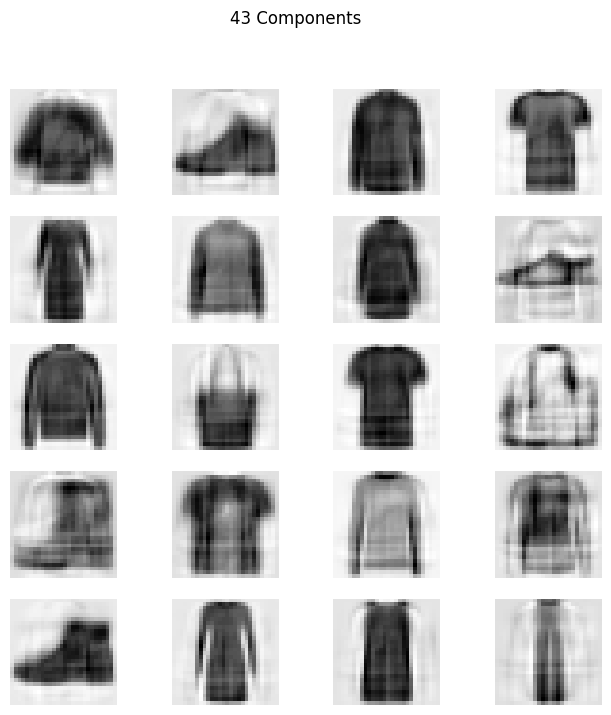

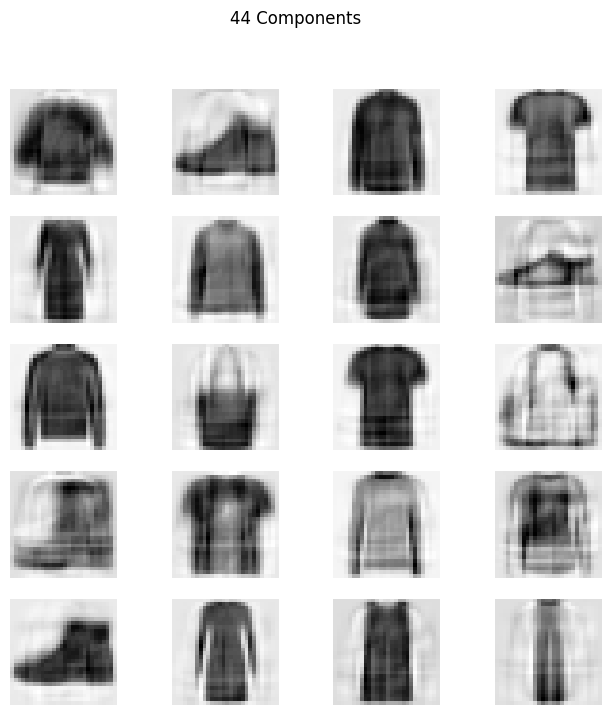

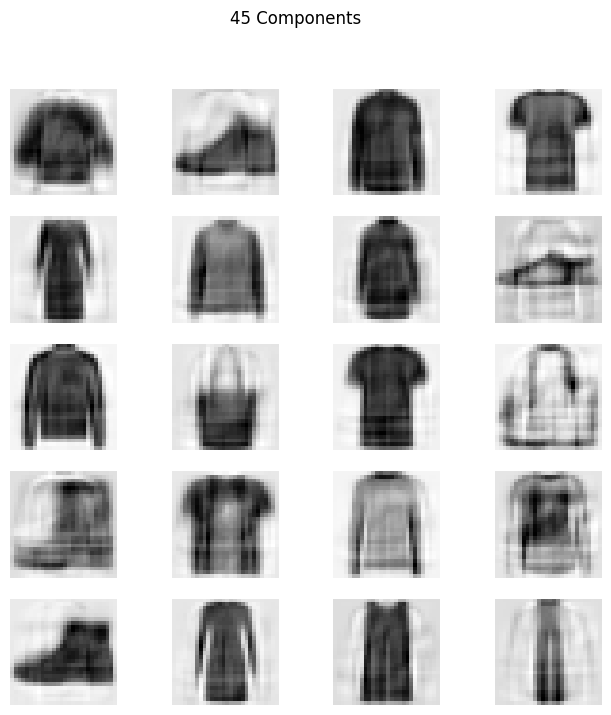

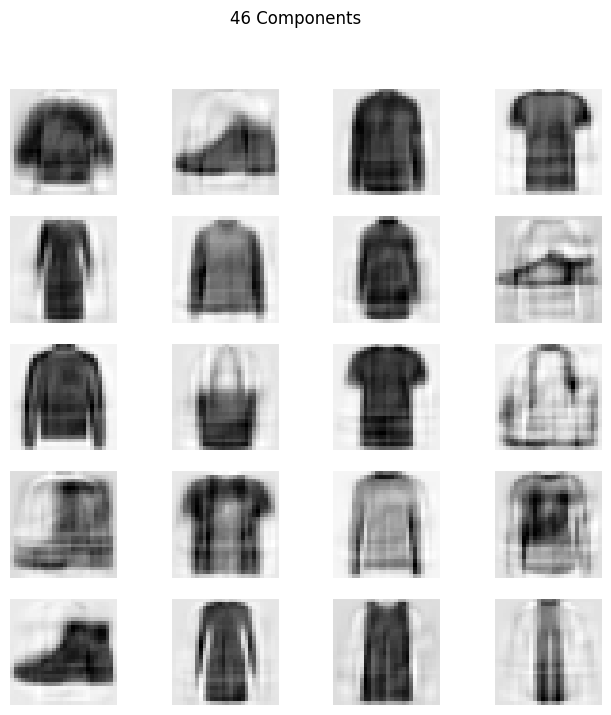

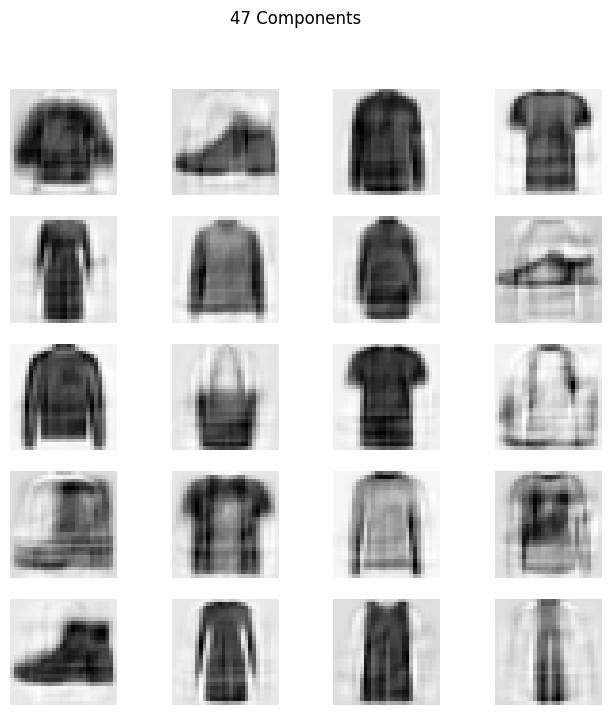

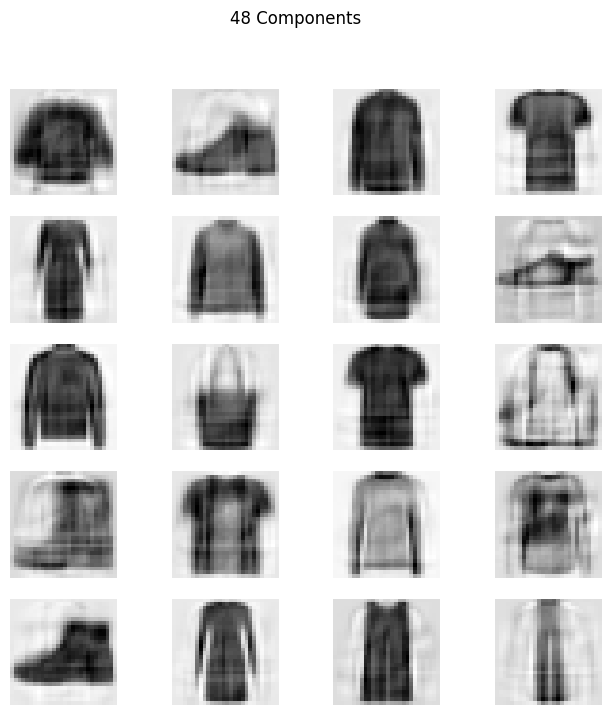

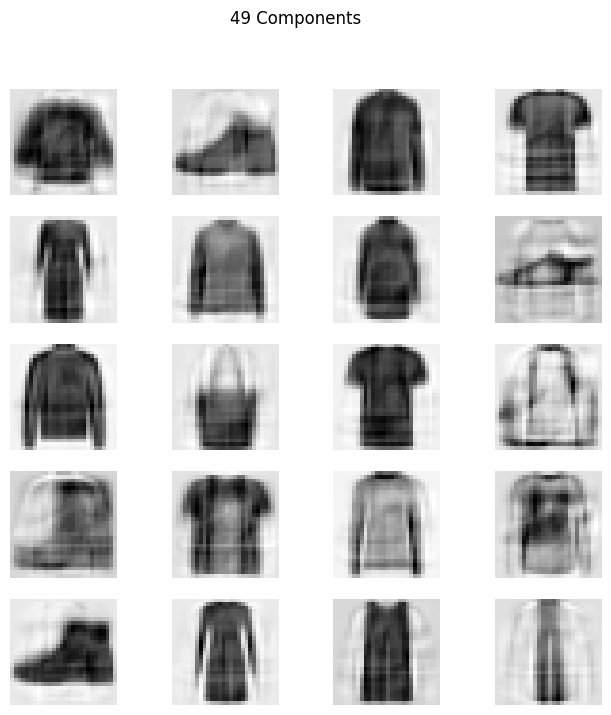

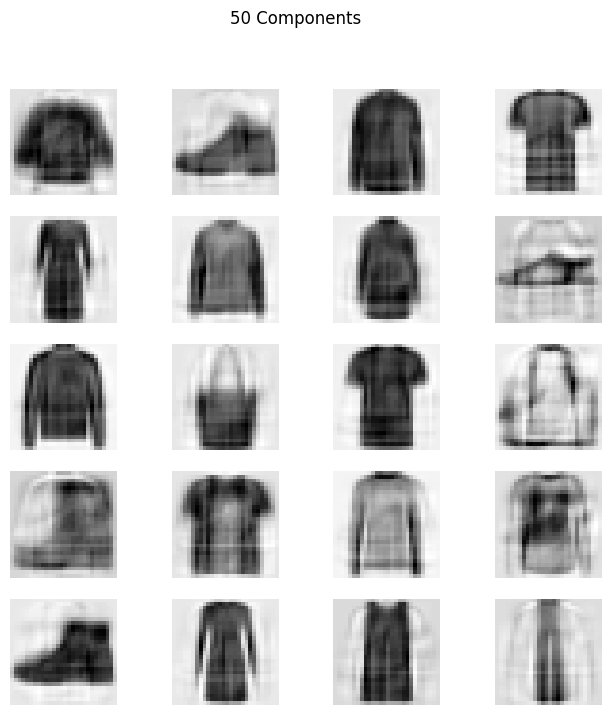

In [15]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Define the range of principal components
start_component = 1
end_component = 50

for n_components in range(start_component, end_component+1):
    pca = PCA(n_components=n_components)
    pca.fit(X_train)
    X_reconstructed_pca = pca.inverse_transform(pca.transform(X_noisy))
    plot_images(X_reconstructed_pca, f'{n_components} Components')  # Pass the title argument



ValueError: ignored

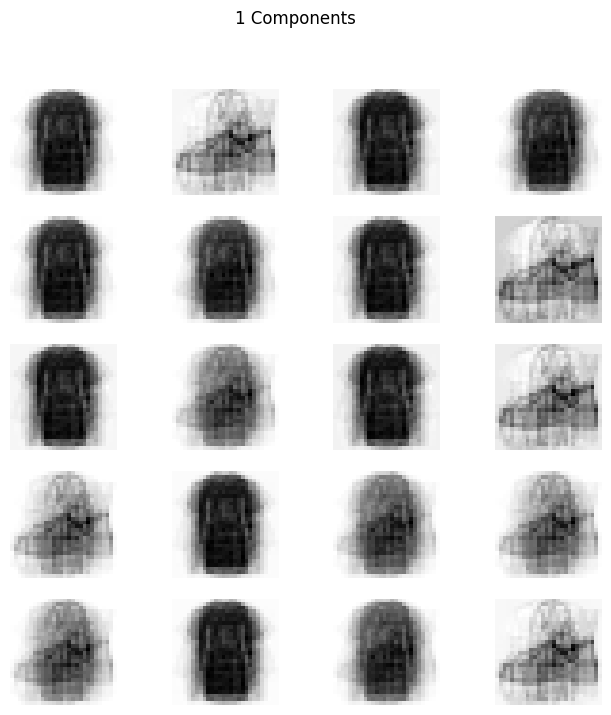

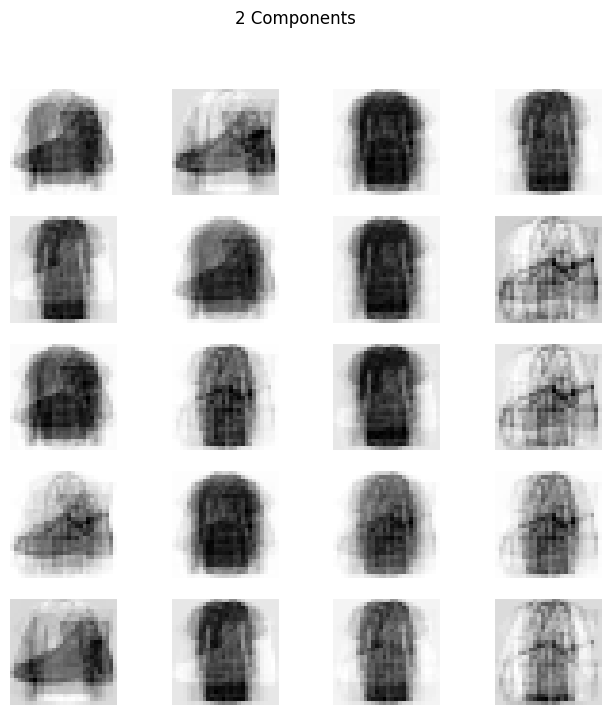

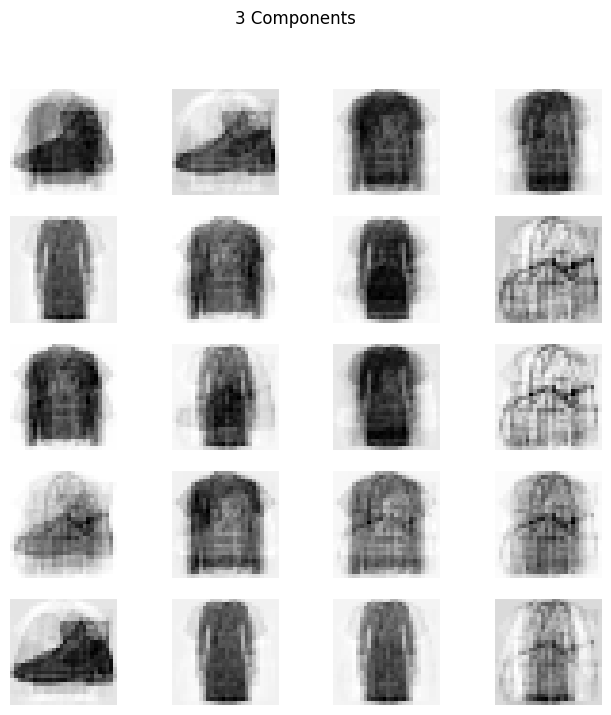

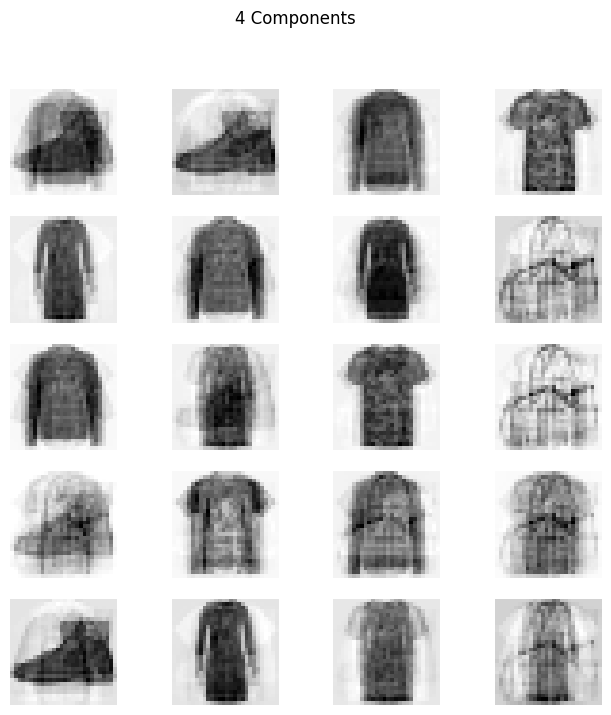

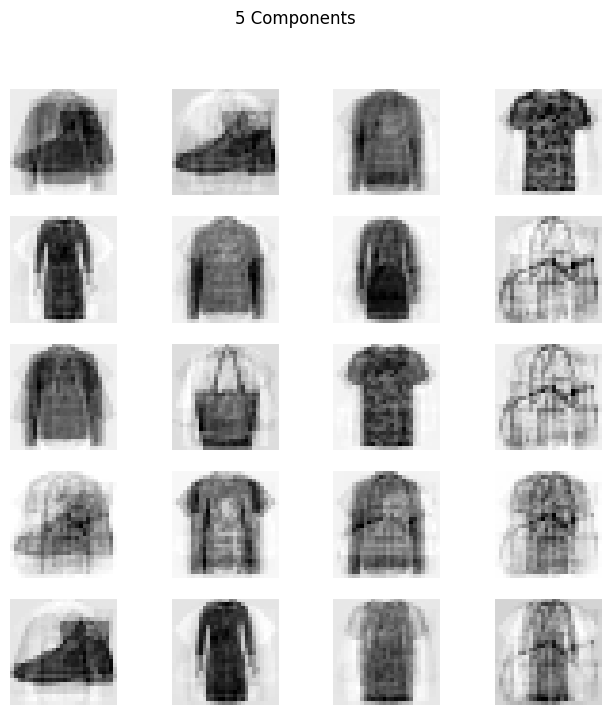

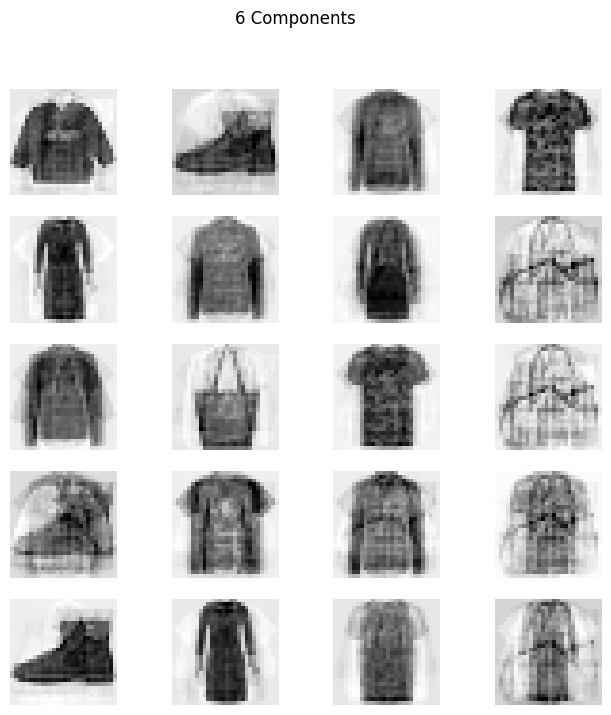

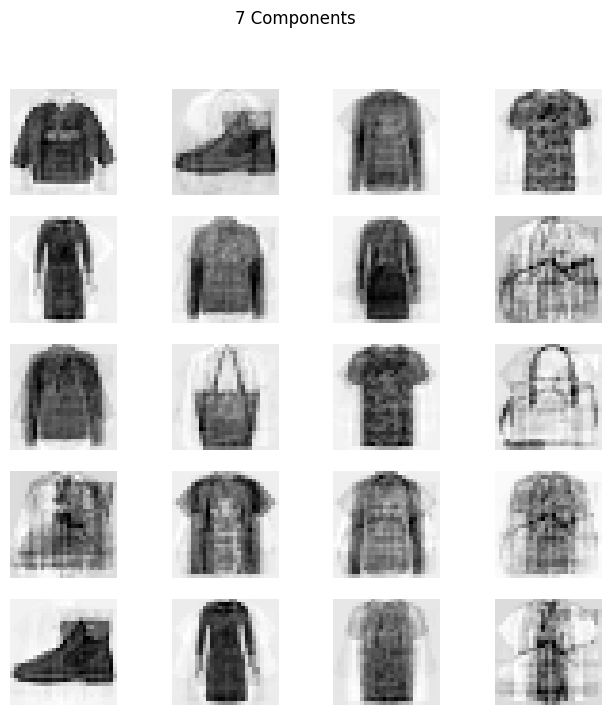

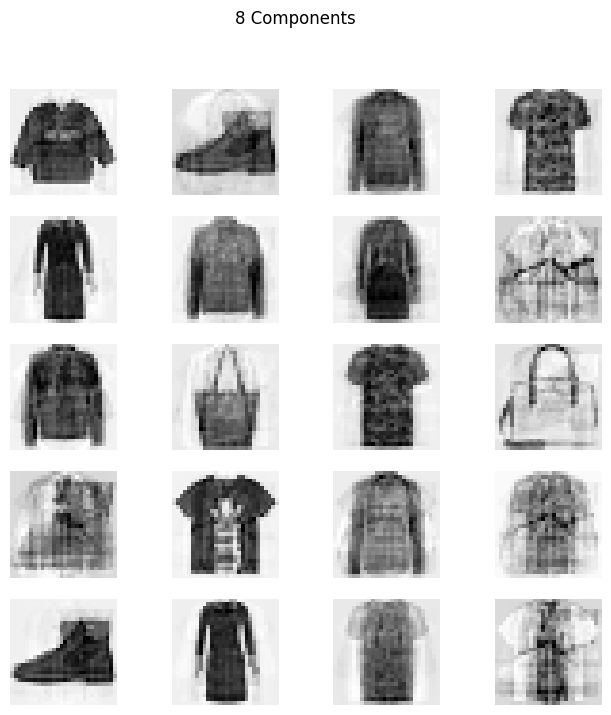

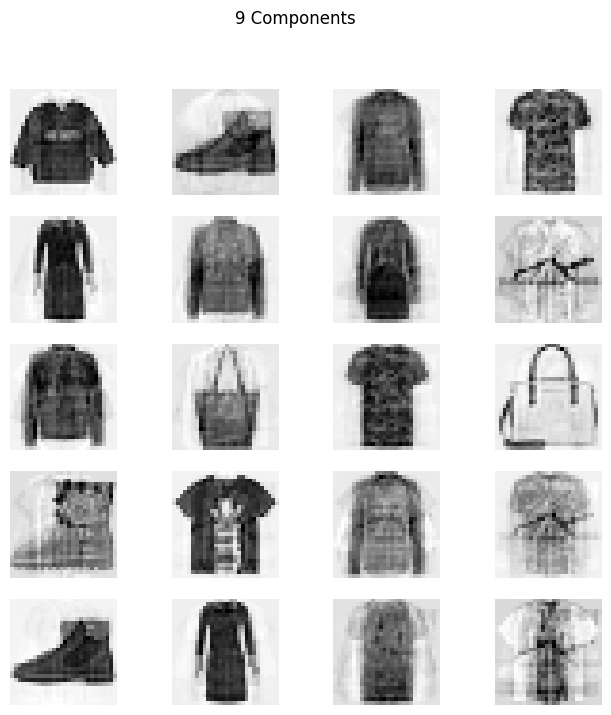

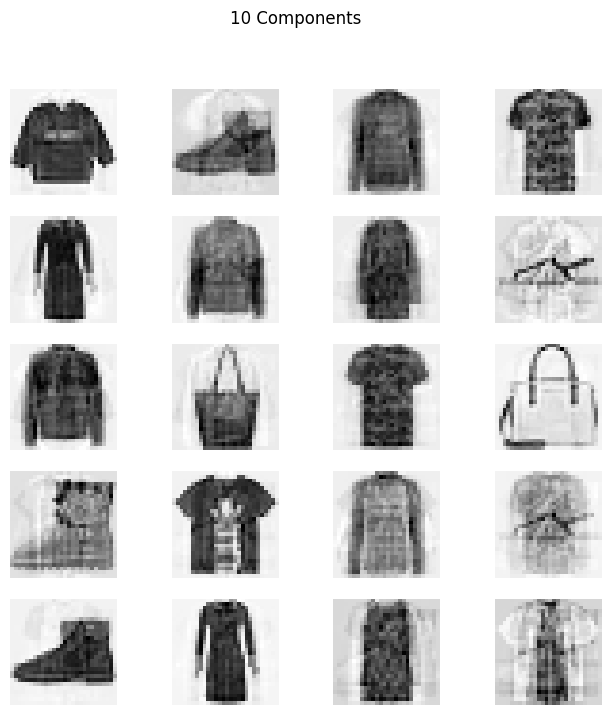

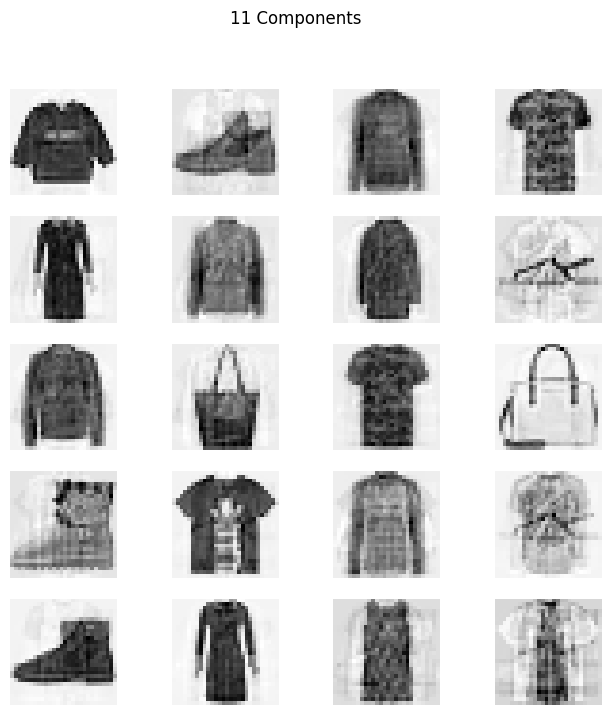

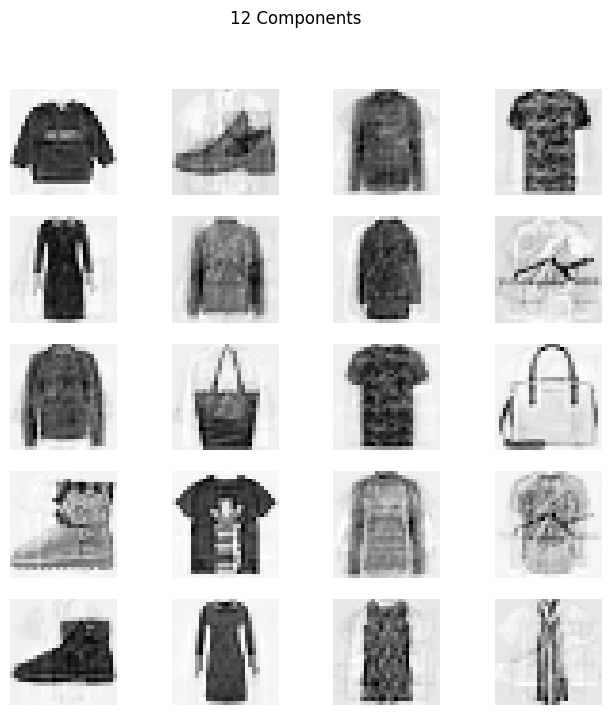

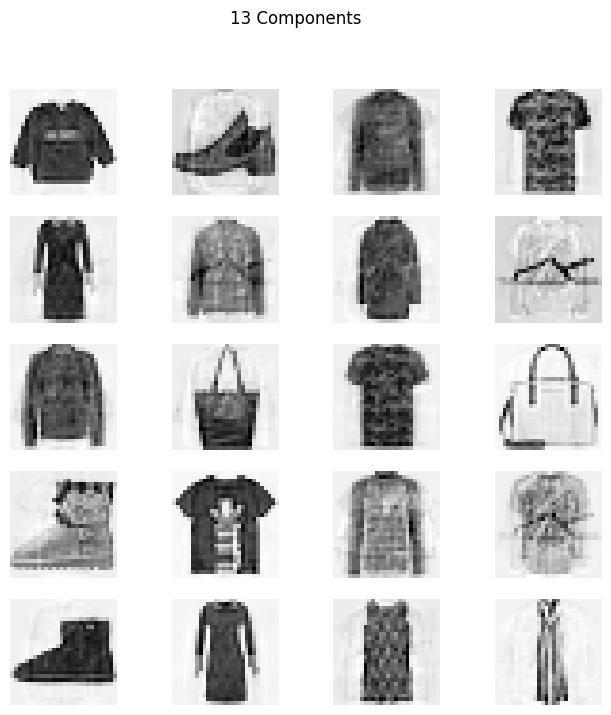

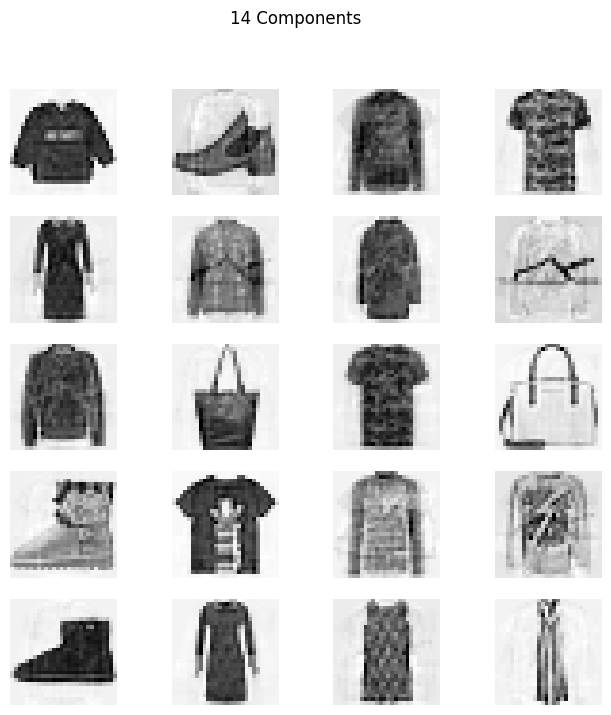

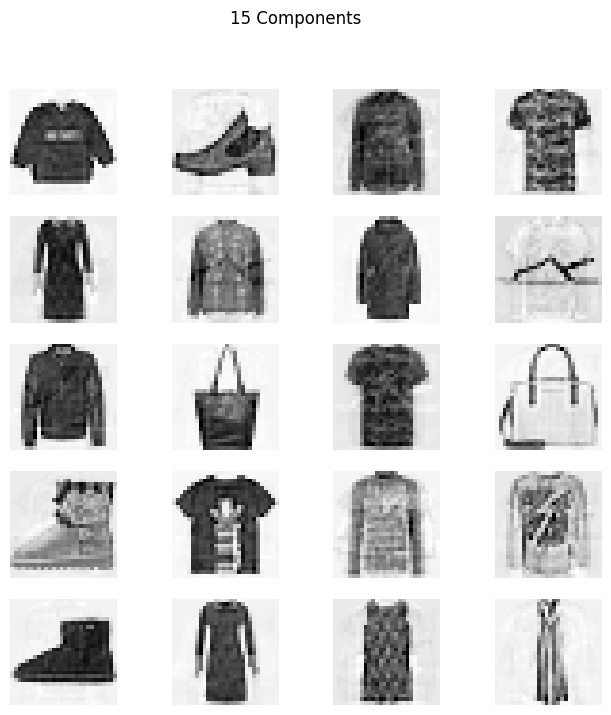

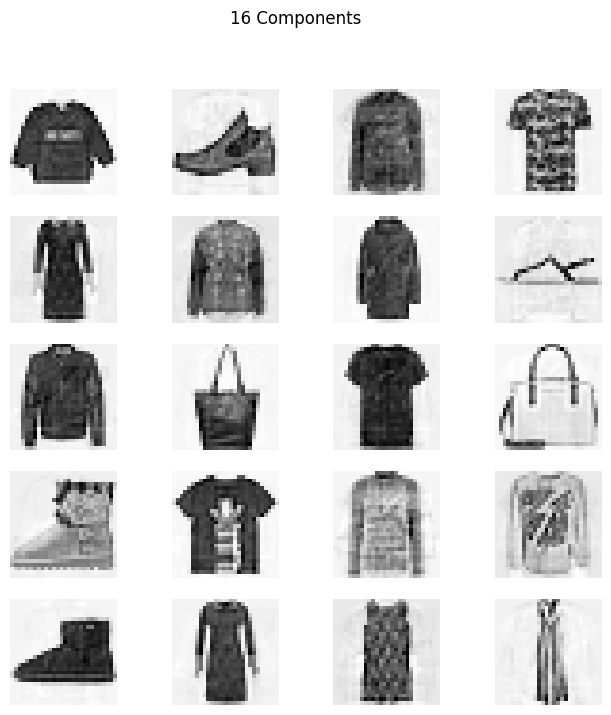

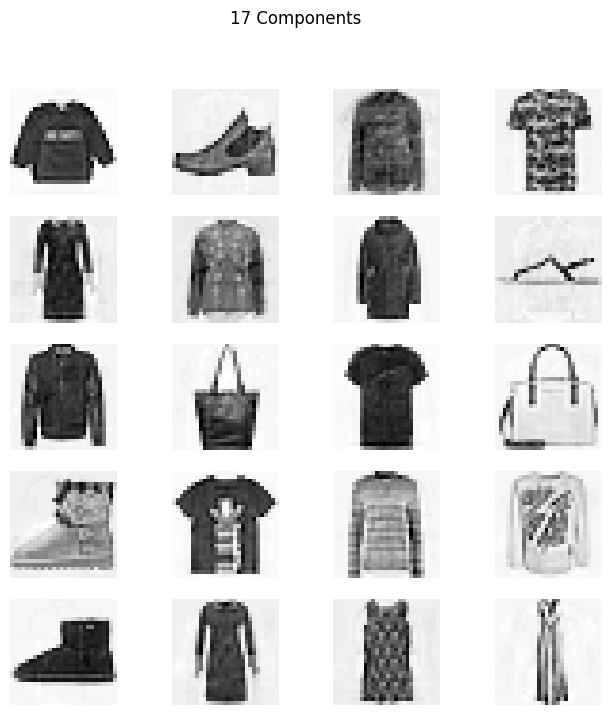

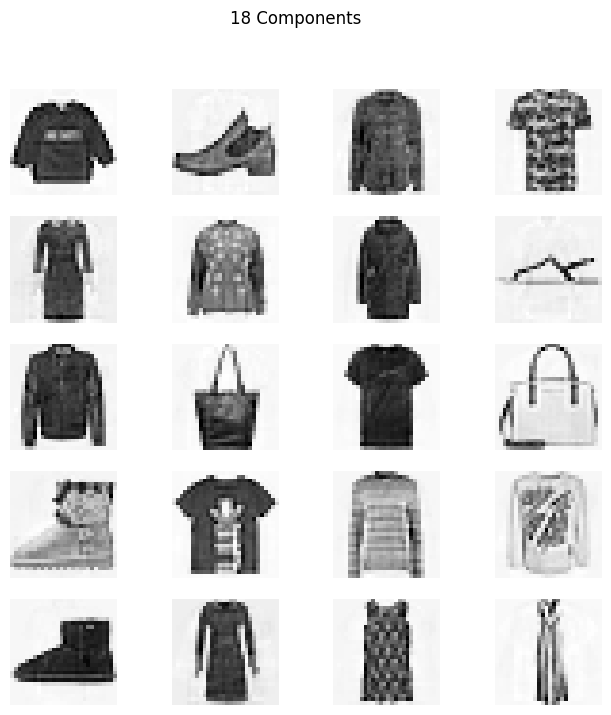

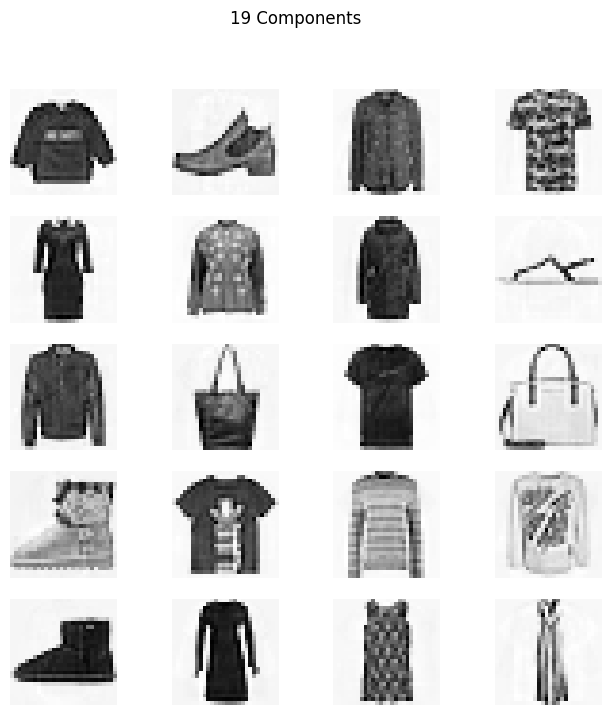

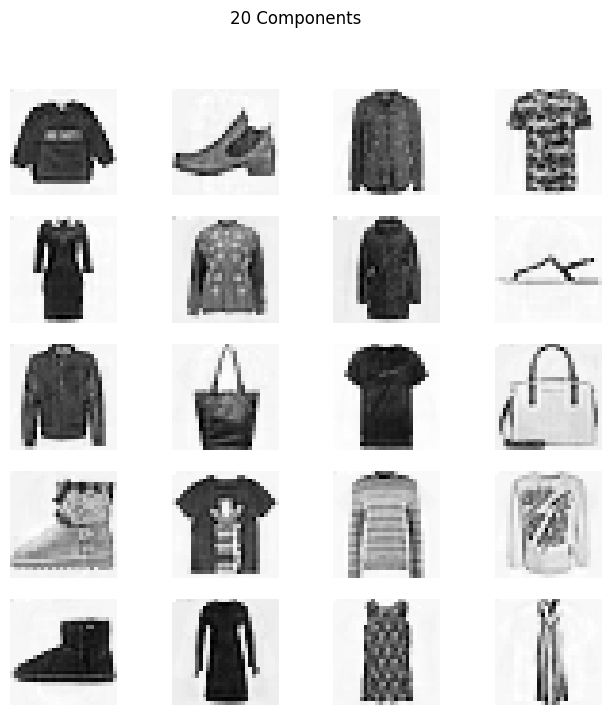

In [16]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Define the range of principal components
start_component = 1
end_component = 50

for n_components in range(start_component, end_component+1):
    pca = PCA(n_components=n_components)
    pca.fit(X_test)
    X_reconstructed_pca = pca.inverse_transform(pca.transform(X_noisy))
    plot_images(X_reconstructed_pca, f'{n_components} Components')  # Pass the title argument

3. Repeat the exercise above but using Kernel PCA instead. Are you able to achieve better results?
- No


ValueError: ignored

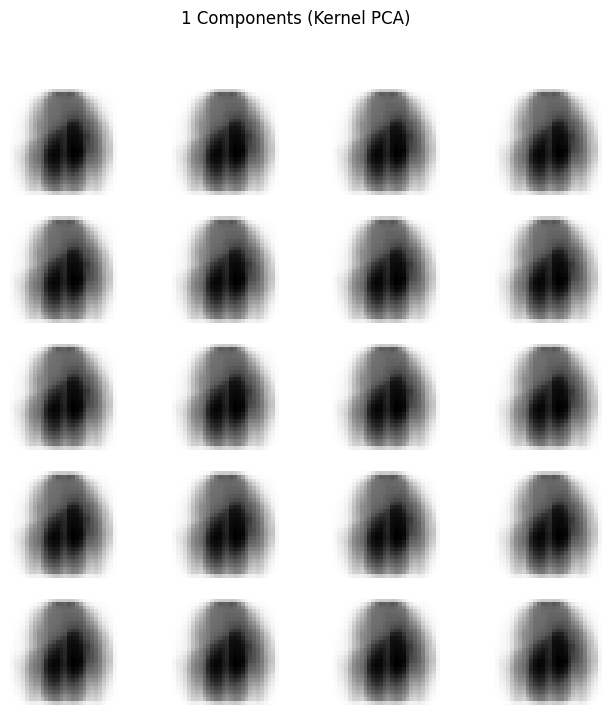

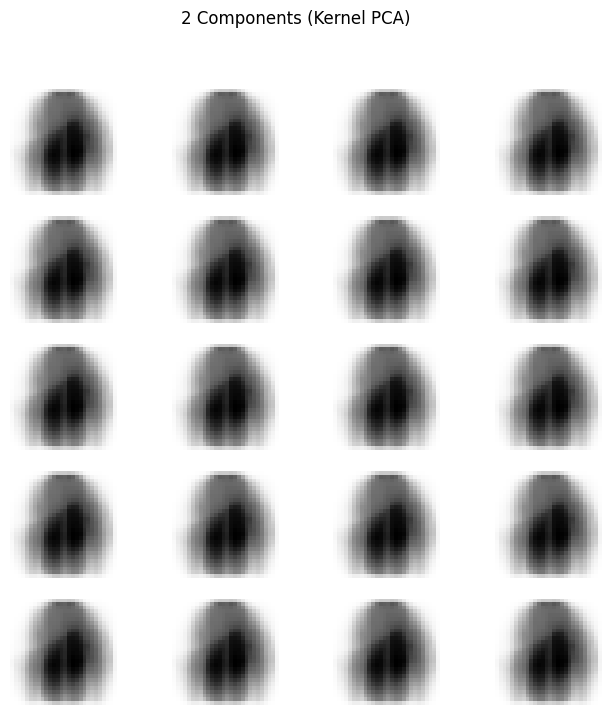

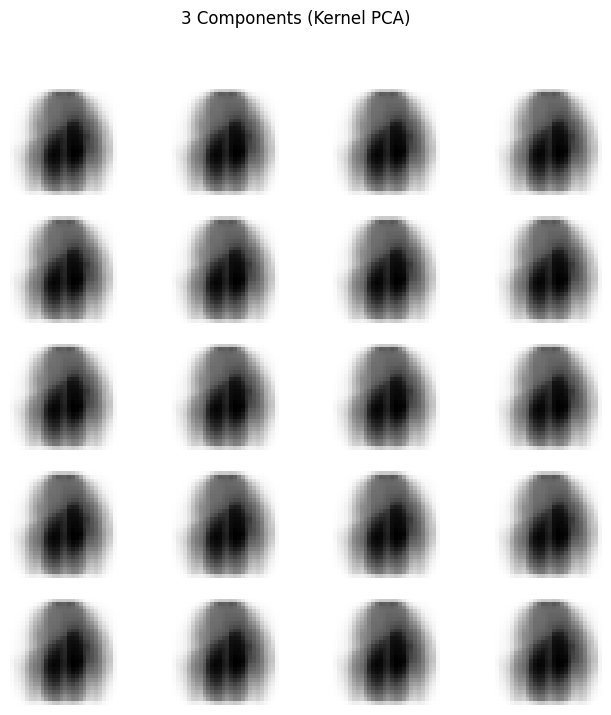

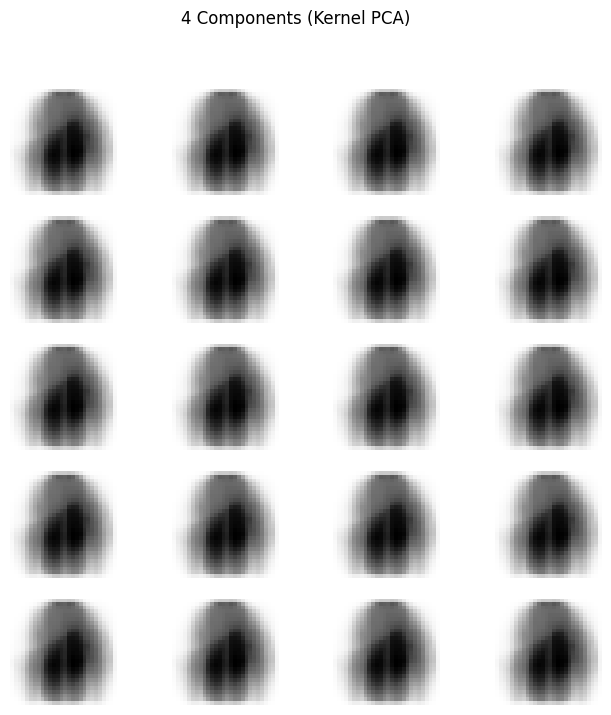

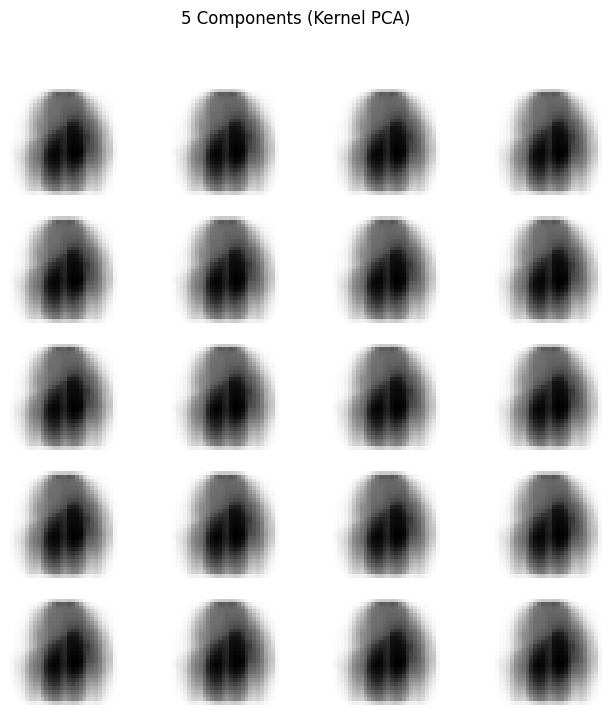

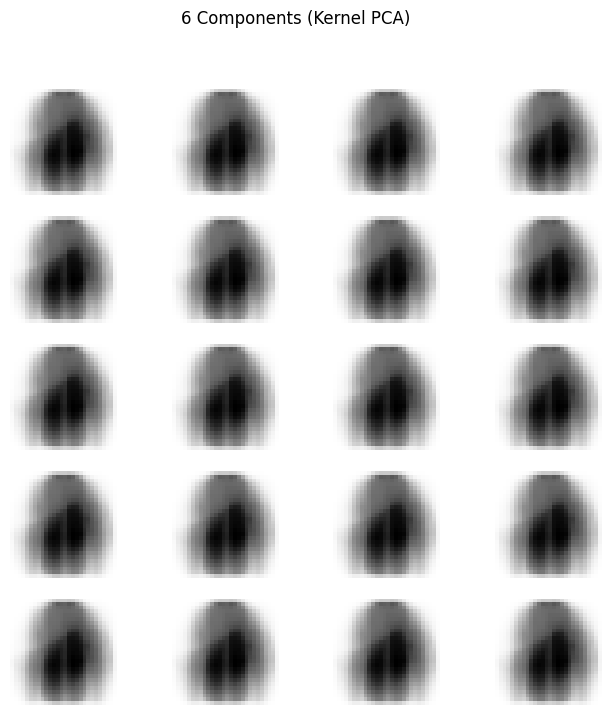

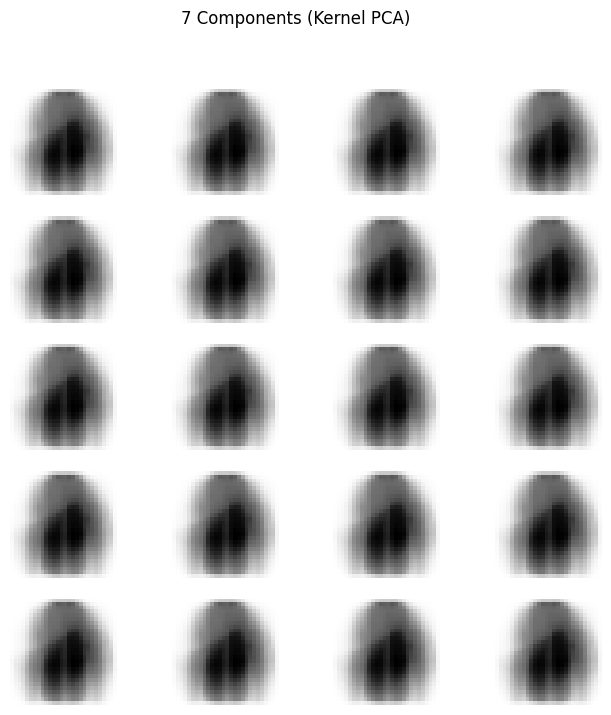

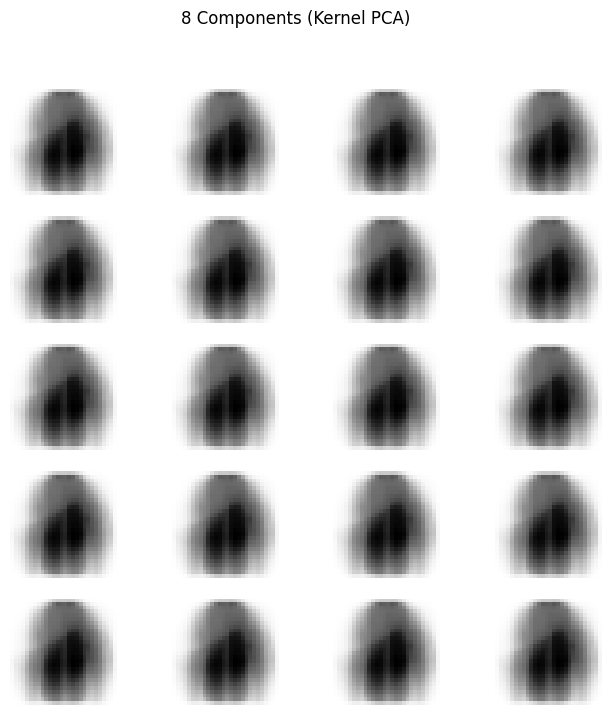

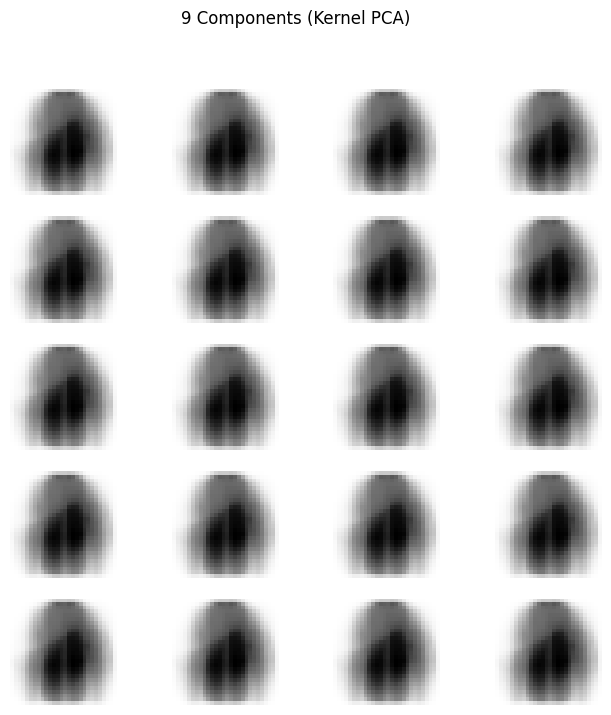

In [17]:
from sklearn.decomposition import KernelPCA

# Define the range of principal components
start_component = 1
end_component = 20

for n_components in range(start_component, end_component+1):
    # fit a Kernel PCA model
    kpca = KernelPCA(n_components=n_components, kernel='rbf', fit_inverse_transform=True)
    kpca.fit(X_train)

    # transform the noisy data into a lower dimensional representation and then back to a high dimensional one
    X_reconstructed_kpca = kpca.inverse_transform(kpca.transform(X_noisy))

    # plot the denoisified images
    #plt.figure(figsize=(8, 8))
    #plt.title(f'Reconstructed using {n_components} Kernel PCA Components')
    plot_images(X_reconstructed_kpca, f'{n_components} Components (Kernel PCA)')  # Pass the title argument
    #plt.show()


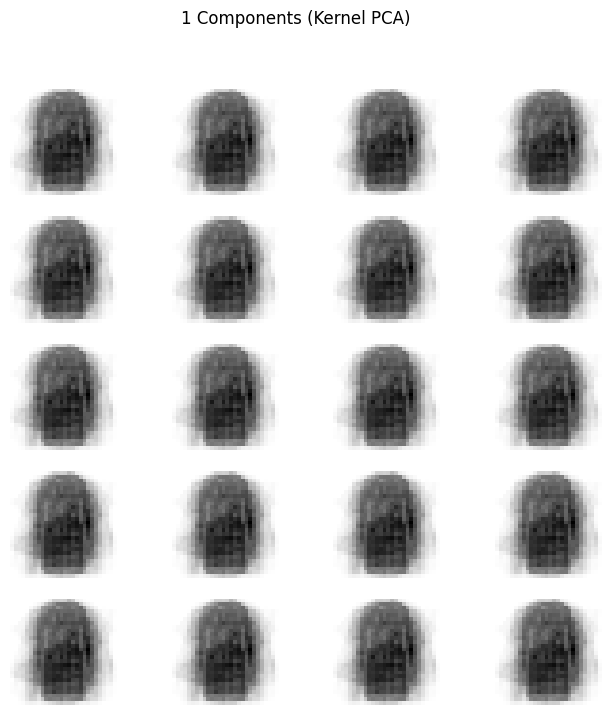

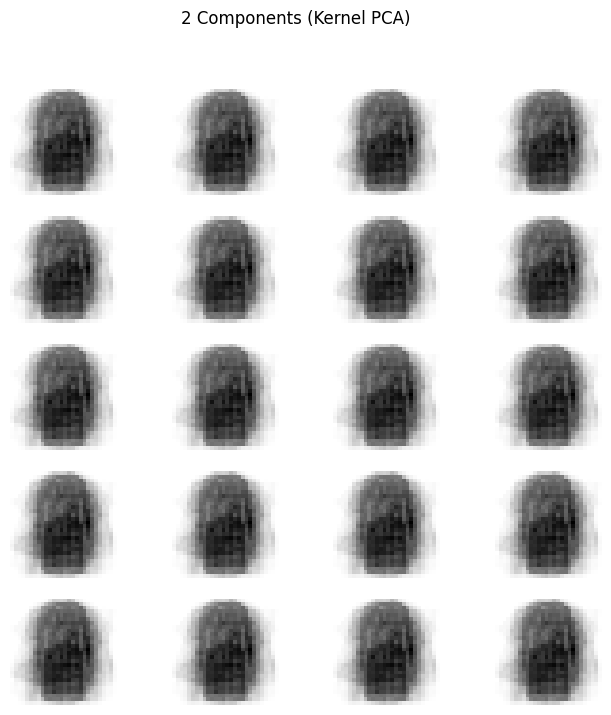

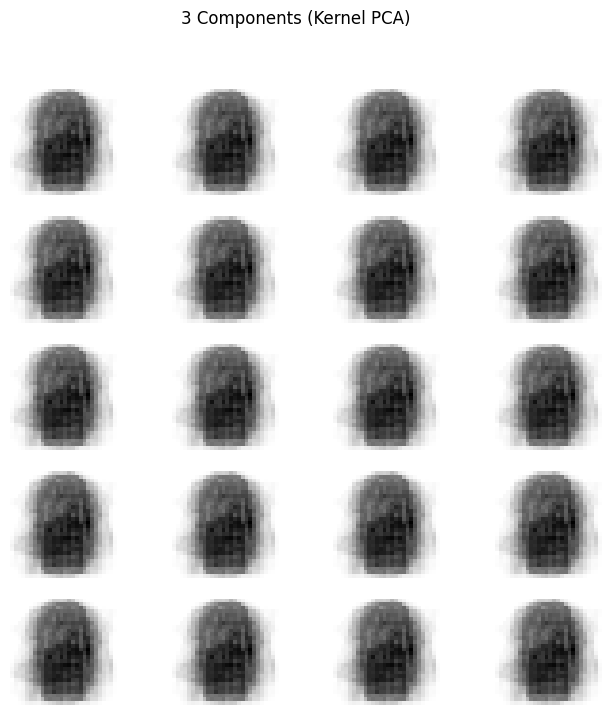

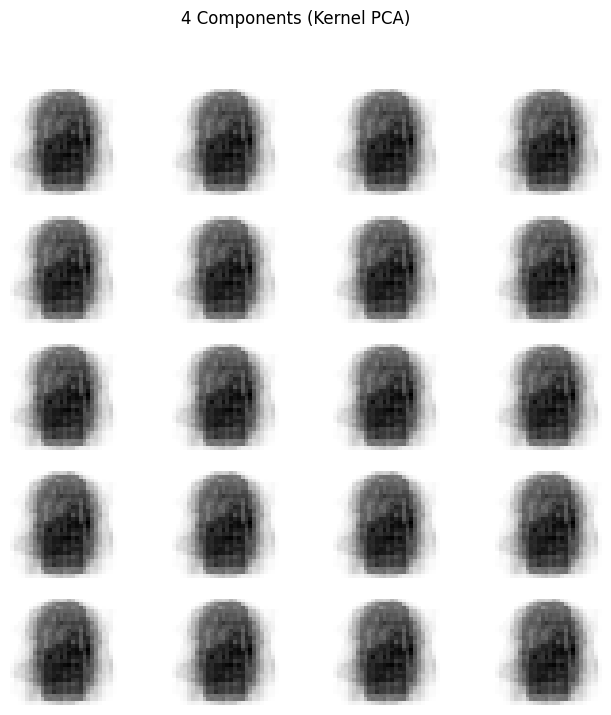

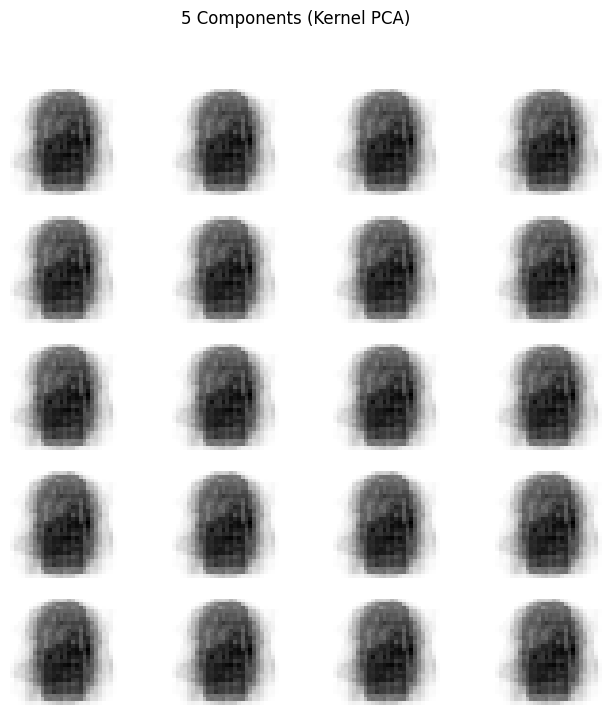

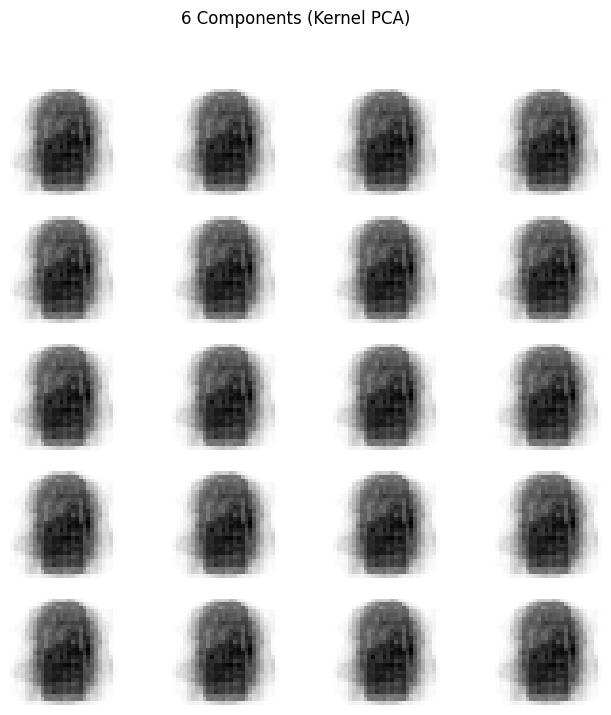

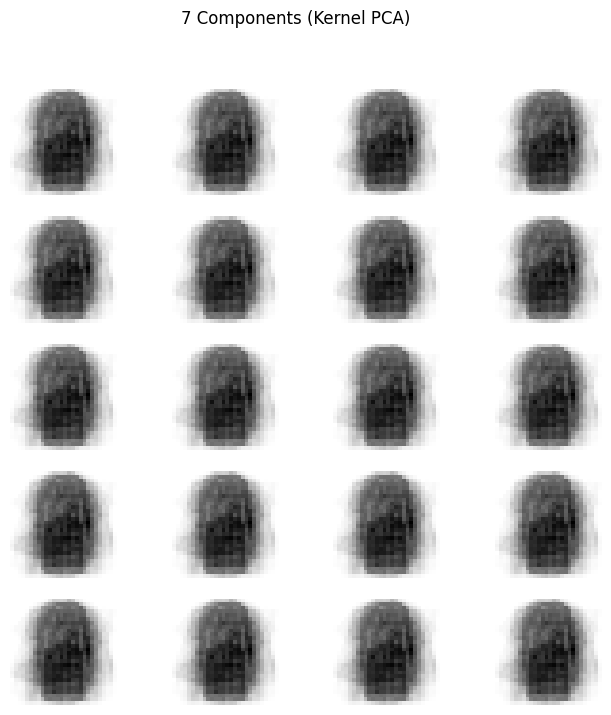

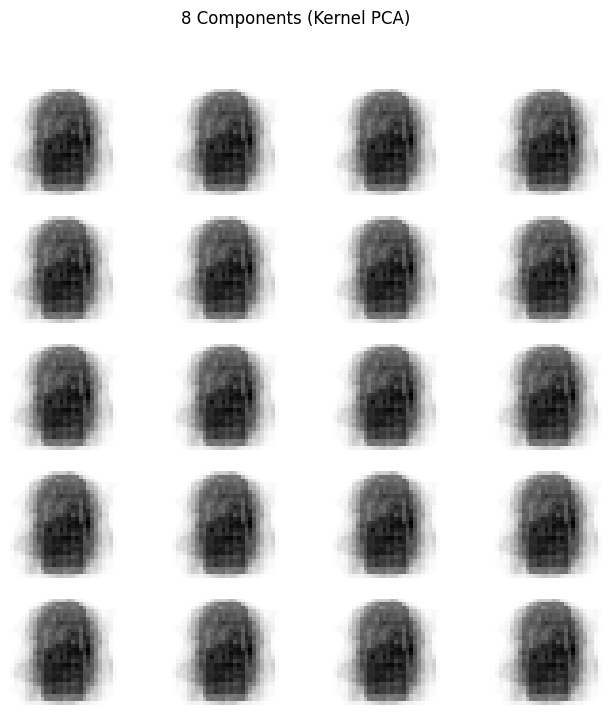

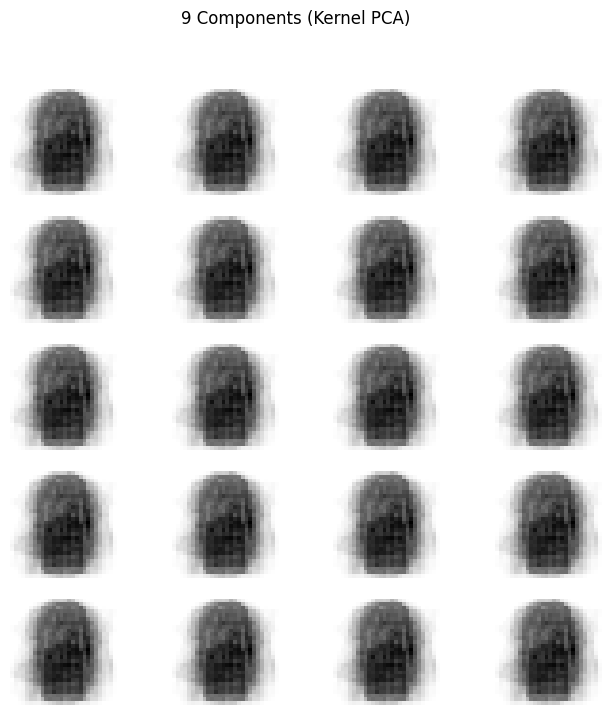

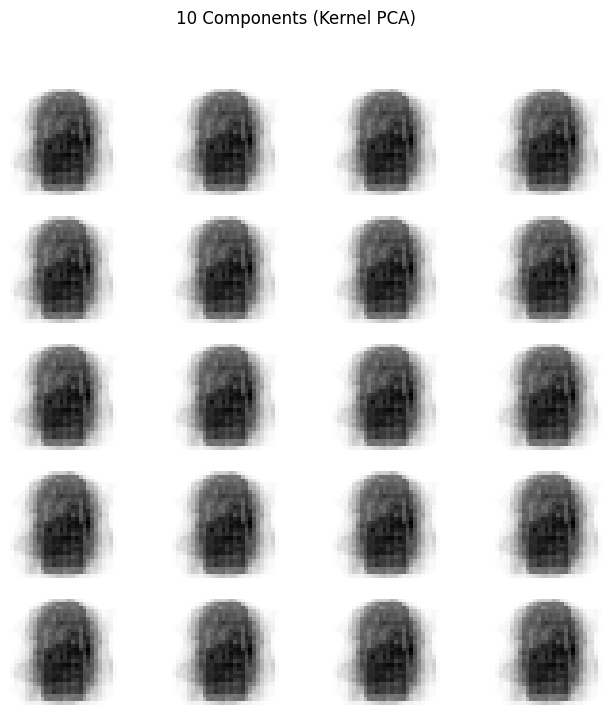

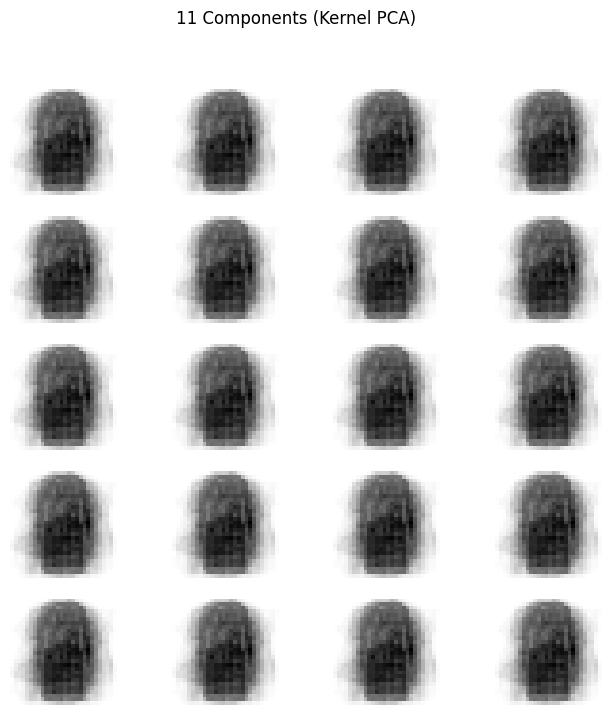

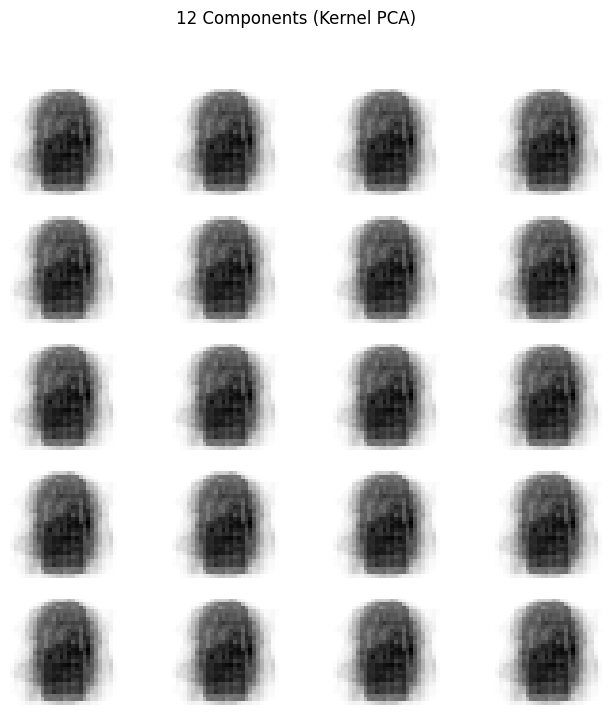

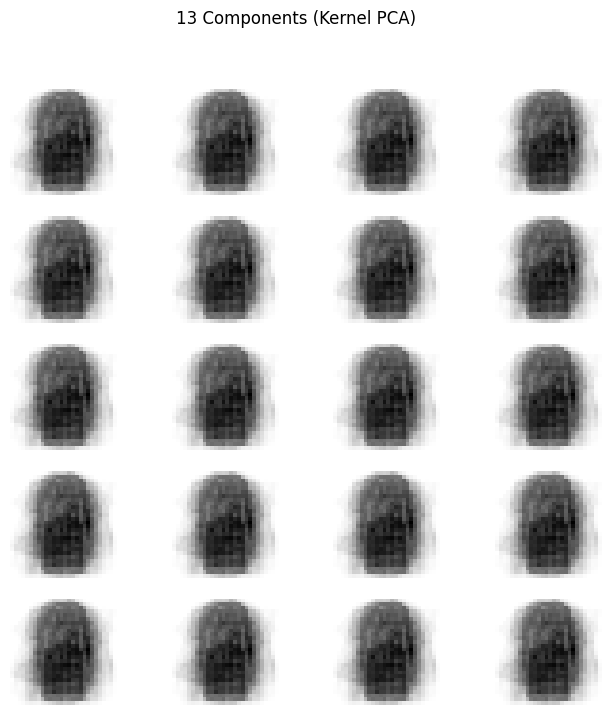

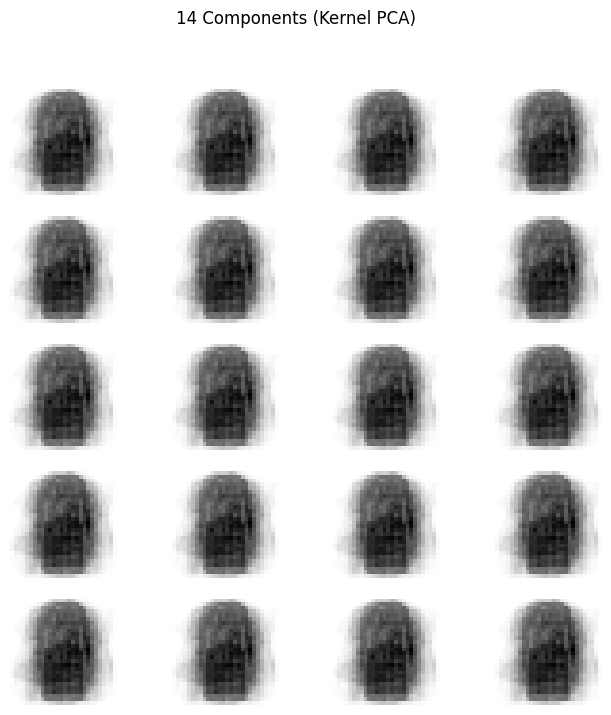

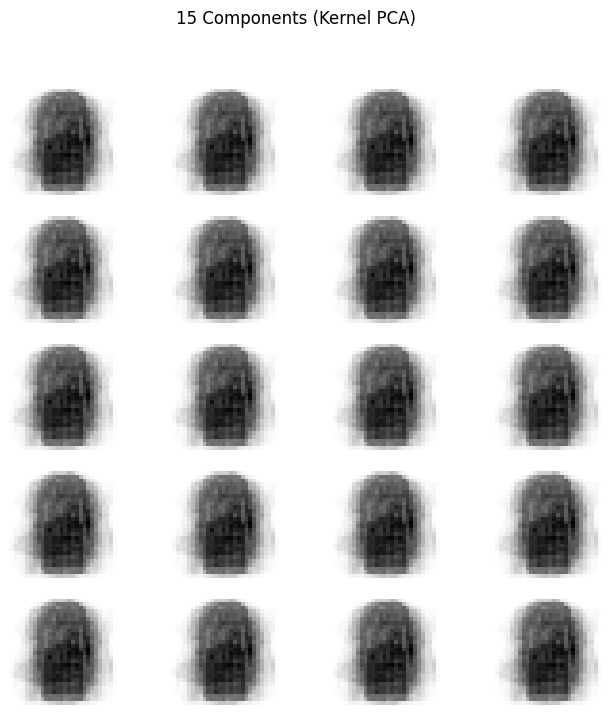

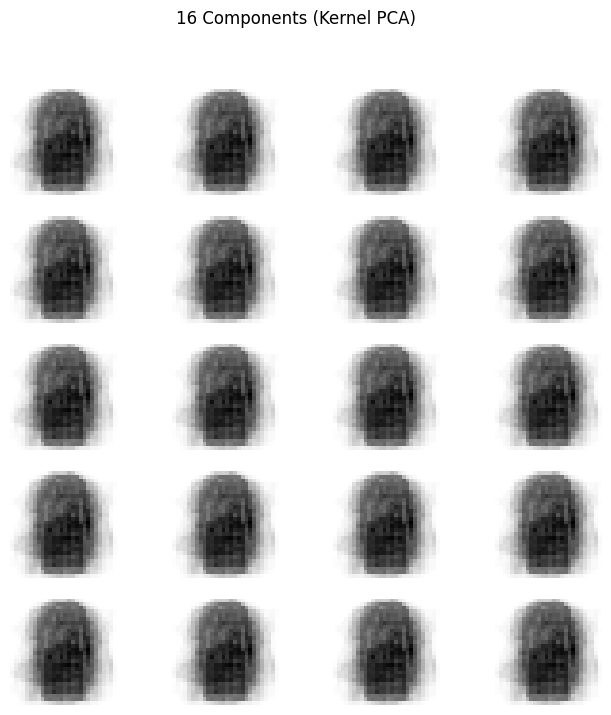

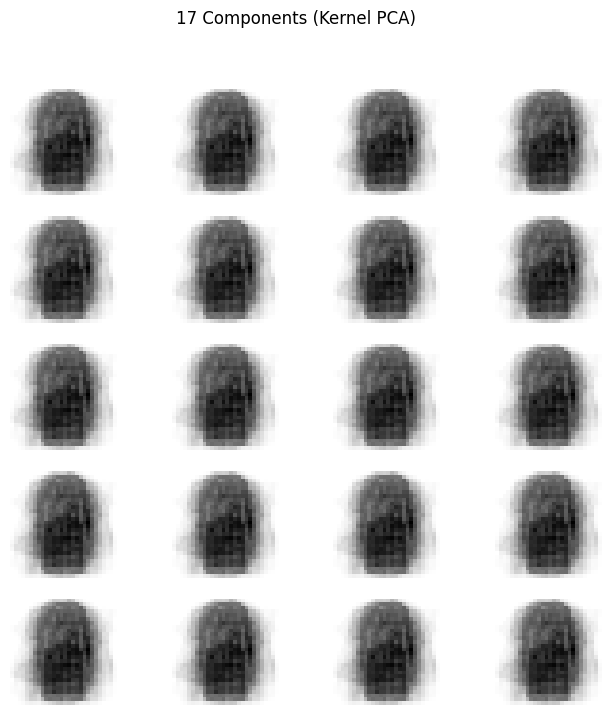

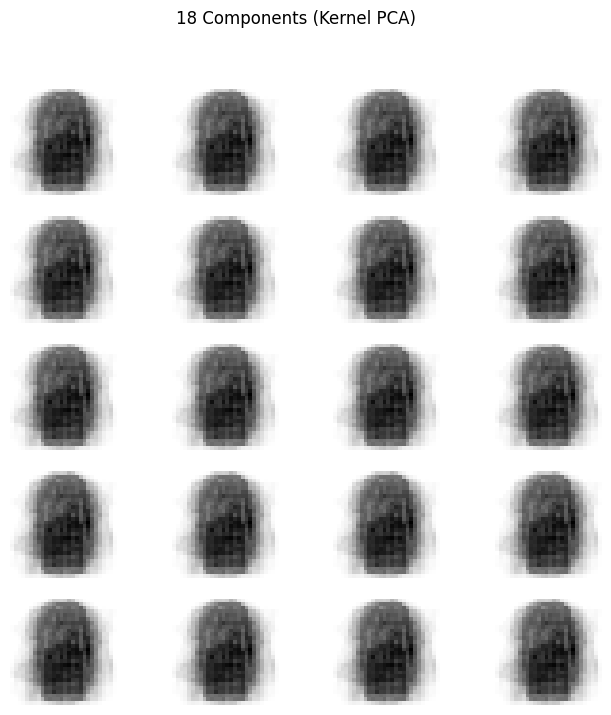

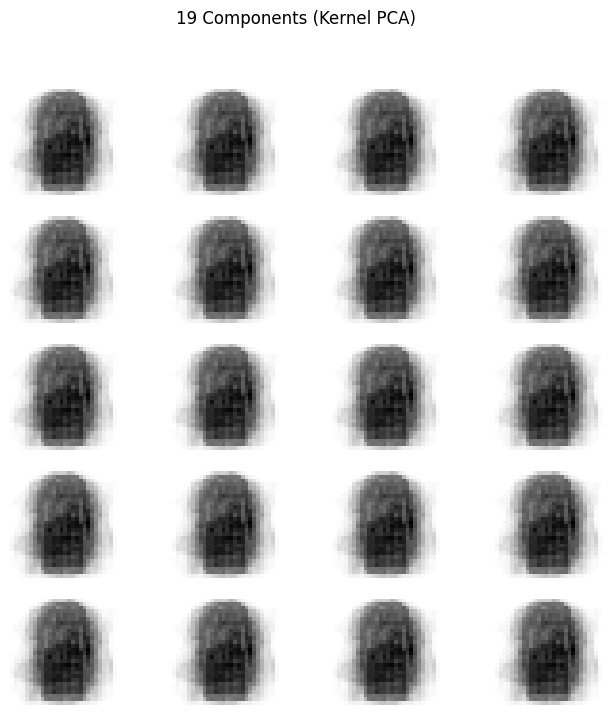

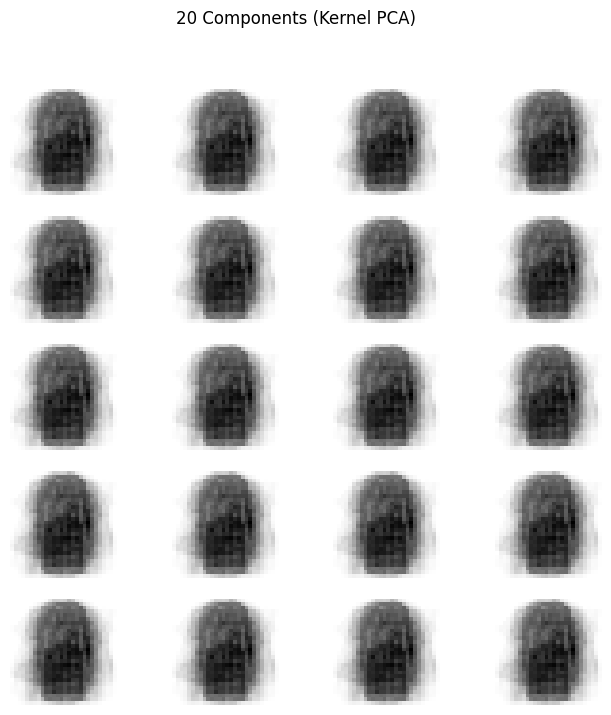

In [18]:
from sklearn.decomposition import KernelPCA

# Define the range of principal components
start_component = 1
end_component = 20

for n_components in range(start_component, end_component+1):
    # fit a Kernel PCA model
    kpca = KernelPCA(n_components=n_components, kernel='rbf', fit_inverse_transform=True)
    kpca.fit(X_test)

    # transform the noisy data into a lower dimensional representation and then back to a high dimensional one
    X_reconstructed_kpca = kpca.inverse_transform(kpca.transform(X_noisy))

    plot_images(X_reconstructed_kpca, f'{n_components} Components (Kernel PCA)')  # Pass the title argument
    #plt.show()

4. Finally, we note that the shoes are not always reconstructed well. Assuming you had labelled images, can you think of a way of improving the denoisification process?
- If I had labeled images, I could improve the denoisification process by using a supervised learning approach. For example, I could train a deep learning model to predict the original image from the noisy image. The model would be trained on a dataset of labeled images, so it would learn to associate the noisy images with the corresponding original images